**<파일 경로>**
- C:/Users/Brian/Desktop/Data Science/Projects/Playdata/dataset/made_by_전처리/train
- C:/Users/Brian/Desktop/Data Science/Projects/Playdata/dataset/made_by_전처리/test

In [1]:
train_path = input()

C:/Users/Brian/Desktop/Data Science/Projects/Playdata/dataset/made_by_전처리/train


In [2]:
test_path = input()

C:/Users/Brian/Desktop/Data Science/Projects/Playdata/dataset/made_by_전처리/test


In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# seaborn 폰트 및 스타일 설정
sns.set(font = "Malgun Gothic", rc = {"axes.unicode_minus": False}, style = 'whitegrid')
# Pandas 출력 결과 부동소수점 설정
pd.options.display.float_format = '{:.1f}'.format

from sklearn.preprocessing import StandardScaler

- 먼저 메모리 절약을 위해 각 변수들의 데이터 타입을 지정해 준 뒤, 각 데이터 셋을 불러오도록 하겠다.

In [4]:
df_dtype = {
    # 지하철 데이터 관련 변수들 데이터 타입 지정
    'hour': np.int32, 'boarding_num': np.int32, 'waiting_area': np.float32, 'platform_area': np.float32, 
    'length': np.int32, 'transfer_num': np.int32, 'entrance': np.int32, 'msi_cnt': np.int32, 
    'hsi_cnt': np.int32, 'uvi_cnt': np.int32, 'hpi_cnt': np.int32, 'mti_cnt': np.int32,
    # 인구 데이터 관련 변수들 데이터 타입 지정
    'total': np.float32, 'pop_below_20': np.float32, 'pop_20': np.float32, 'pop_30': np.float32, 
    'pop_40': np.float32, 'pop_50': np.float32, 'pop_60': np.float32, 'pop_over_70': np.float32,
    # 기상 데이터 관련 변수들 데이터 타입 변경
    'temp': np.float32, 'windspeed': np.float32, 'rain': np.float32
}

In [5]:
df_train = pd.read_csv('{}/df_train.csv'.format(train_path), dtype = df_dtype)
df_test = pd.read_csv('{}/df_test.csv'.format(test_path), dtype = df_dtype)
df_train.head()

C:\Users\Brian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Brian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,line,station_name,boarding,hour,boarding_num,waiting_area,platform_area,gu,type,...,windspeed,rain,total,pop_below_20,pop_20,pop_30,pop_40,pop_50,pop_60,pop_over_70
0,2018-01-01,1호선,서울역,승차,0,96,8725.0,2080.0,중구,섬식,...,2.6,0.0,10096.0,1046.0,1822.0,1716.0,1713.0,1420.0,1264.0,1119.0
1,2018-01-01,1호선,서울역,하차,0,147,8725.0,2080.0,중구,섬식,...,2.6,0.0,10096.0,1046.0,1822.0,1716.0,1713.0,1420.0,1264.0,1119.0
2,2018-01-01,1호선,서울역,승차,5,373,8725.0,2080.0,중구,섬식,...,2.2,0.0,8031.0,848.0,1392.0,1373.0,1417.0,1213.0,957.0,835.0
3,2018-01-01,1호선,서울역,하차,5,205,8725.0,2080.0,중구,섬식,...,2.2,0.0,8031.0,848.0,1392.0,1373.0,1417.0,1213.0,957.0,835.0
4,2018-01-01,1호선,서울역,승차,6,318,8725.0,2080.0,중구,섬식,...,2.0,0.0,9589.0,961.0,1637.0,1564.0,1554.0,1616.0,1279.0,981.0


- 추가적인 메모리 절약을 위해, date 변수를 제외한 나머지 object 타입 변수들을 모두 category 타입으로 변환해주겠다.

In [6]:
df_cat = ['line', 'station_name', 'boarding', 'type', 
          'floor', 'transfer', 'gate', 'gu', 'dong']

for cat in tqdm(df_cat):
    df_train[cat] = df_train[cat].astype('category')
    df_test[cat] = df_test[cat].astype('category')
    
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7476280 entries, 0 to 7476279
Data columns (total 33 columns):
 #   Column         Dtype   
---  ------         -----   
 0   date           object  
 1   line           category
 2   station_name   category
 3   boarding       category
 4   hour           int32   
 5   boarding_num   int32   
 6   waiting_area   float32 
 7   platform_area  float32 
 8   gu             category
 9   type           category
 10  length         int32   
 11  floor          category
 12  transfer       category
 13  transfer_num   int32   
 14  entrance       int32   
 15  gate           category
 16  msi_cnt        int32   
 17  hsi_cnt        int32   
 18  uvi_cnt        int32   
 19  hpi_cnt        int32   
 20  mti_cnt        int32   
 21  dong           category
 22  temp           float32 
 23  windspeed      float32 
 24  rain           float32 
 25  total          float32 
 26  pop_below_20   float32 
 27  pop_20         float32 
 28  pop_30     

- 분석에는 2호선 데이터만 사용할 것이므로, 2호선 데이터만 추출하도록 하겠다.

In [7]:
df_train = df_train[df_train['line'] == '2호선']
df_test = df_test[df_test['line'] == '2호선']

In [8]:
df_train.describe()

,hour,boarding_num,waiting_area,platform_area,length,transfer_num,entrance,msi_cnt,hsi_cnt,uvi_cnt,...,windspeed,rain,total,pop_below_20,pop_20,pop_30,pop_40,pop_50,pop_60,pop_over_70
count,1460000.0,1460000.0,1460000.0,1460000.0,1460000.0,1460000.0,1460000.0,1460000.0,1460000.0,1460000.0,...,1460000.0,1460000.0,1436000.0,1436000.0,1436000.0,1436000.0,1436000.0,1436000.0,1436000.0,1436000.0
mean,13.3,1546.6,4753.0,2561.1,197.3,0.9,5.9,1.3,0.9,0.6,...,1.9,0.1,40647.3,4473.4,9093.0,8182.1,6575.9,5128.4,3734.2,3460.3
std,6.1,1922.2,2310.1,1128.8,22.9,1.2,2.3,1.0,1.0,0.8,...,1.2,1.0,30890.4,3020.6,9784.6,8484.6,5674.3,3234.3,2016.7,1716.3
min,0.0,0.0,625.0,798.0,90.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1910.0,121.0,419.0,293.0,222.0,217.0,185.0,192.0
25%,8.8,369.0,3631.0,1957.0,205.0,0.0,4.0,1.0,0.0,0.0,...,1.0,0.0,22056.0,2360.0,3420.0,3485.0,3253.0,3057.0,2372.0,2213.0
50%,13.5,946.0,4214.5,2345.5,205.0,0.0,6.0,1.0,1.0,0.0,...,1.7,0.0,31911.0,4033.0,5432.0,5520.0,4866.0,4296.0,3274.0,3045.0
75%,18.2,1996.0,5570.0,2664.0,205.0,2.0,8.0,2.0,1.0,1.0,...,2.5,0.0,47058.0,5770.0,10001.0,8463.0,7676.0,6421.0,4711.0,4423.0
max,23.0,25206.0,13442.0,7175.0,205.0,4.0,11.0,4.0,4.0,3.0,...,16.8,53.0,210360.0,46463.0,71495.0,57634.0,51276.0,44805.0,24757.0,31345.0


# 결측치 처리
- 결측치 존재 여부를 확인해보니, 인구 데이터 관련 변수들에 결측치들이 존재한다.
- 앞서 인구 데이터 셋 자체에서 결측치 확인을 했을 때에는 결측치들이 존재하지 않았다.
    - 즉, 인구 데이터 셋에서 비는 일자(date)가 존재했다는 의미이다. (조인 과정에서 결측치가 발생함)
    - 따라서 비어있는 일자(date)에 대해서 존재하는 결측치들을 모두 평균 값으로 대체해주겠다.

In [9]:
df_train.isnull().sum()

date                  0
line                  0
station_name          0
boarding              0
hour                  0
boarding_num          0
waiting_area          0
platform_area         0
gu                    0
type                  0
length                0
floor                 0
transfer         846800
transfer_num          0
entrance              0
gate                  0
msi_cnt               0
hsi_cnt               0
uvi_cnt               0
hpi_cnt               0
mti_cnt               0
dong                  0
temp                  0
windspeed             0
rain                  0
total             24000
pop_below_20      24000
pop_20            24000
pop_30            24000
pop_40            24000
pop_50            24000
pop_60            24000
pop_over_70       24000
dtype: int64

In [10]:
null_date_total = list(set(df_train[df_train.total.isnull()]['date']))
null_date_total.sort()
null_date_total

['2019-10-19',
 '2019-10-20',
 '2019-10-21',
 '2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30']

In [11]:
null_date_pop_below_20 = list(set(df_train[df_train.pop_below_20.isnull()]['date']))
null_date_pop_below_20.sort()
null_date_pop_below_20

['2019-10-19',
 '2019-10-20',
 '2019-10-21',
 '2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30']

In [12]:
null_date_pop_20 = list(set(df_train[df_train.pop_20.isnull()]['date']))
null_date_pop_20.sort()
null_date_pop_20

['2019-10-19',
 '2019-10-20',
 '2019-10-21',
 '2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30']

In [13]:
null_date_pop_30 = list(set(df_train[df_train.pop_30.isnull()]['date']))
null_date_pop_30.sort()
null_date_pop_30

['2019-10-19',
 '2019-10-20',
 '2019-10-21',
 '2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30']

In [14]:
null_date_pop_40 = list(set(df_train[df_train.pop_40.isnull()]['date']))
null_date_pop_40.sort()
null_date_pop_40

['2019-10-19',
 '2019-10-20',
 '2019-10-21',
 '2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30']

In [15]:
null_date_pop_50 = list(set(df_train[df_train.pop_50.isnull()]['date']))
null_date_pop_50.sort()
null_date_pop_50

['2019-10-19',
 '2019-10-20',
 '2019-10-21',
 '2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30']

In [16]:
null_date_pop_60 = list(set(df_train[df_train.pop_60.isnull()]['date']))
null_date_pop_60.sort()
null_date_pop_60

['2019-10-19',
 '2019-10-20',
 '2019-10-21',
 '2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30']

In [17]:
null_date_pop_over_70 = list(set(df_train[df_train.pop_over_70.isnull()]['date']))
null_date_pop_over_70.sort()
null_date_pop_over_70

['2019-10-19',
 '2019-10-20',
 '2019-10-21',
 '2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28',
 '2019-10-29',
 '2019-10-30']

- 각 변수마다 결측값이 어느 일자에 존재하는지 확인해 본 결과, 위와 같이 모두 동일한 일자에 결측값들이 존재함을 알 수 있다.
    - 즉, 결측값이 존재하는 모든 변수들은 2019-10-19 ~ 2019-10-30 일자가 비어있다.
- 따라서 해당 결측치들을 각 변수들의 2019년 10월 데이터의 평균 값으로 대체해주도록 하겠다.
    - ex) 2019-10-19 일자가 비어있는 total 변수에 대해서 2019년 10월 total의 전체 평균 값으로 대체!!

In [18]:
df_train.isnull().sum()

date                  0
line                  0
station_name          0
boarding              0
hour                  0
boarding_num          0
waiting_area          0
platform_area         0
gu                    0
type                  0
length                0
floor                 0
transfer         846800
transfer_num          0
entrance              0
gate                  0
msi_cnt               0
hsi_cnt               0
uvi_cnt               0
hpi_cnt               0
mti_cnt               0
dong                  0
temp                  0
windspeed             0
rain                  0
total             24000
pop_below_20      24000
pop_20            24000
pop_30            24000
pop_40            24000
pop_50            24000
pop_60            24000
pop_over_70       24000
dtype: int64

In [19]:
null_vars = ['total', 'pop_below_20', 'pop_20', 'pop_30', 
             'pop_40', 'pop_50', 'pop_60', 'pop_over_70']

for var in tqdm(null_vars):
    # 각 변수별로 2019년 10월 전체 평균 값을 계산 후, 올림 처리
    oct_mean = np.ceil(np.nanmean(df_train[df_train['date'].str.contains('2019-10')][[var]]))
    # 결측치 대체
    df_train[var].fillna(oct_mean, inplace = True)

In [20]:
df_train.isnull().sum()

date                  0
line                  0
station_name          0
boarding              0
hour                  0
boarding_num          0
waiting_area          0
platform_area         0
gu                    0
type                  0
length                0
floor                 0
transfer         846800
transfer_num          0
entrance              0
gate                  0
msi_cnt               0
hsi_cnt               0
uvi_cnt               0
hpi_cnt               0
mti_cnt               0
dong                  0
temp                  0
windspeed             0
rain                  0
total                 0
pop_below_20          0
pop_20                0
pop_30                0
pop_40                0
pop_50                0
pop_60                0
pop_over_70           0
dtype: int64

In [21]:
# 결측치 대체가 잘 이루어졌는지 확인
df_train[df_train['date'].str.contains('2019-10-19')][null_vars] # 샘플로 2019-10-19 일자만 확인

,total,pop_below_20,pop_20,pop_30,pop_40,pop_50,pop_60,pop_over_70
318240,40306.0,4588.0,9003.0,8179.0,6624.0,5089.0,3596.0,3233.0
318241,40306.0,4588.0,9003.0,8179.0,6624.0,5089.0,3596.0,3233.0
318242,40306.0,4588.0,9003.0,8179.0,6624.0,5089.0,3596.0,3233.0
318243,40306.0,4588.0,9003.0,8179.0,6624.0,5089.0,3596.0,3233.0
318244,40306.0,4588.0,9003.0,8179.0,6624.0,5089.0,3596.0,3233.0
...,...,...,...,...,...,...,...,...
1749075,40306.0,4588.0,9003.0,8179.0,6624.0,5089.0,3596.0,3233.0
1749076,40306.0,4588.0,9003.0,8179.0,6624.0,5089.0,3596.0,3233.0
1749077,40306.0,4588.0,9003.0,8179.0,6624.0,5089.0,3596.0,3233.0
1749078,40306.0,4588.0,9003.0,8179.0,6624.0,5089.0,3596.0,3233.0


# 탐색적 자료 분석(EDA)

- 본격적으로 EDA를 하기에 앞서, date 변수를 사용하여 아래 4개의 변수들을 새로 만들어주겠다.
    - year
    - month
    - day
    - weekday
        - 0: 월요일
        - 1: 화요일
        - 2: 수요일
        - 3: 목요일
        - 4: 금요일
        - 5: 토요일
        - 6: 일요일

In [22]:
# object to datetime
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

# 연/월/일/요일 변수 생성
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['weekday'] = df_train['date'].dt.weekday

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['weekday'] = df_test['date'].dt.weekday

df_train.head()

,date,line,station_name,boarding,hour,boarding_num,waiting_area,platform_area,gu,type,...,pop_20,pop_30,pop_40,pop_50,pop_60,pop_over_70,year,month,day,weekday
292000,2018-01-01,2호선,시청,승차,0,2,9008.0,3553.0,중구,섬식,...,2332.0,2329.0,1835.0,1286.0,914.0,756.0,2018,1,1,0
292001,2018-01-01,2호선,시청,하차,0,17,9008.0,3553.0,중구,섬식,...,2332.0,2329.0,1835.0,1286.0,914.0,756.0,2018,1,1,0
292002,2018-01-01,2호선,시청,승차,5,37,9008.0,3553.0,중구,섬식,...,1559.0,1954.0,1530.0,1039.0,860.0,789.0,2018,1,1,0
292003,2018-01-01,2호선,시청,하차,5,35,9008.0,3553.0,중구,섬식,...,1559.0,1954.0,1530.0,1039.0,860.0,789.0,2018,1,1,0
292004,2018-01-01,2호선,시청,승차,6,57,9008.0,3553.0,중구,섬식,...,1650.0,1939.0,1543.0,1035.0,911.0,745.0,2018,1,1,0


## Barplot
- 편리성을 위해 barplot을 그려주는 함수를 새로 하나 만들어서, 아래의 5가지 경우에 대한 barplot을 그려보겠다.
    1. 연도별 평균 승/하차 인원
    2. 월별 평균 승/하차 인원
    3. 일별 평균 승/하차 인원
    4. 요일별 평균 승/하차 인원
    5. 시간대별 평균 승/하차 인원

In [23]:
def draw_barplot(colname, title):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))

    # plot 그리기
    sns.barplot(x = colname, y = 'boarding_num', data = df_train[df_train['boarding'] == '승차'], ax = ax1)
    sns.barplot(x = colname, y = 'boarding_num', data = df_train[df_train['boarding'] == '하차'], ax = ax2)

    # title 설정
    ax1.set_title('{}별 평균 승차 인원 수'.format(title), fontsize = 23)
    ax2.set_title('{}별 평균 하차 인원 수'.format(title), fontsize = 23)

    # xlabel, ylabel 설정
    ax1.set_xlabel(colname, fontsize = 20)
    ax1.set_ylabel('boarding_num(승차)', fontsize = 20)
    ax2.set_xlabel(colname, fontsize = 20)
    ax2.set_ylabel('boarding_num(하차)', fontsize = 20)

    # tick 설정
    ax1.tick_params(labelsize = 15)
    ax2.tick_params(labelsize = 15)

    plt.show()

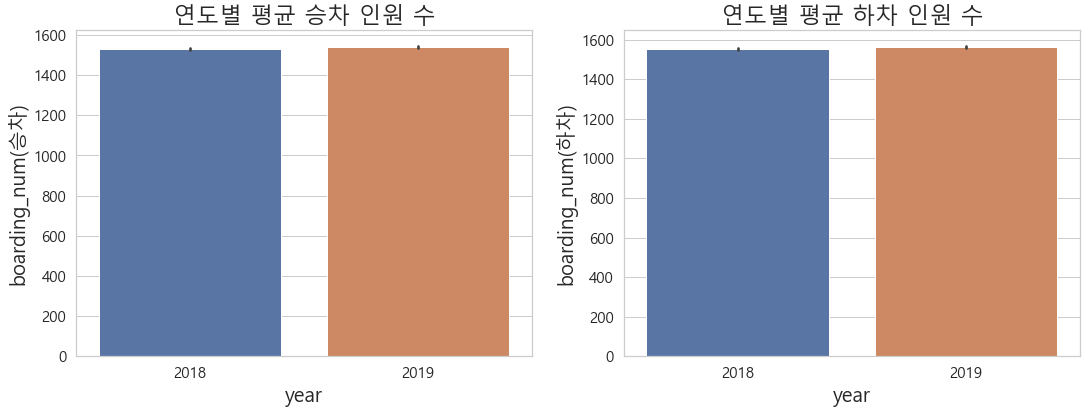

In [24]:
# 연도별 평균 승/하차 인원
draw_barplot('year', '연도')

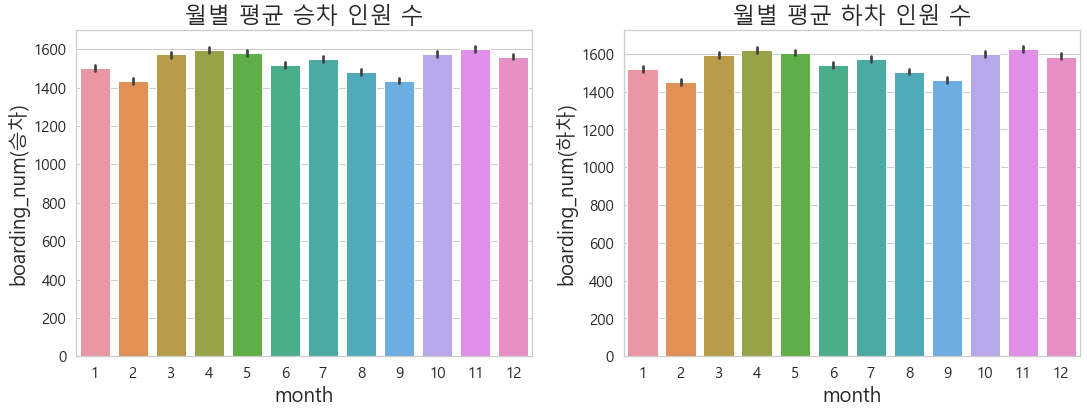

In [25]:
# 월별 평균 승/하차 인원
draw_barplot('month', '월')

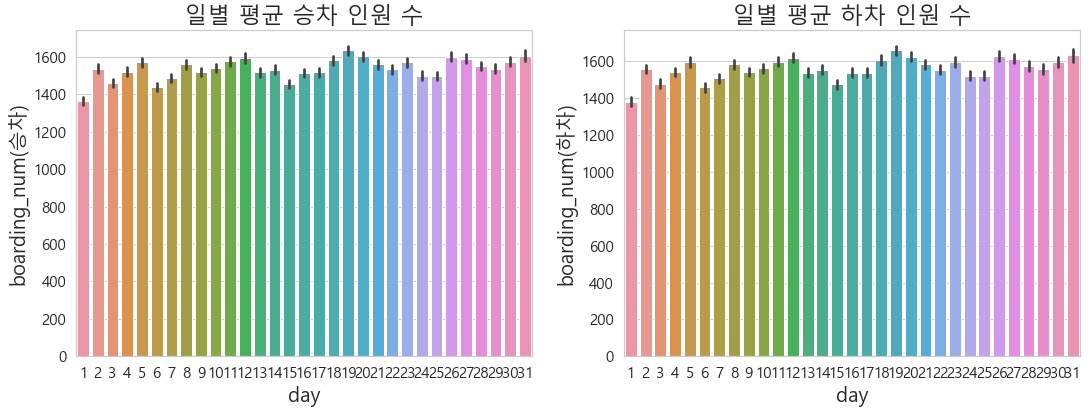

In [26]:
# 일별 평균 승/하차 인원
draw_barplot('day', '일')

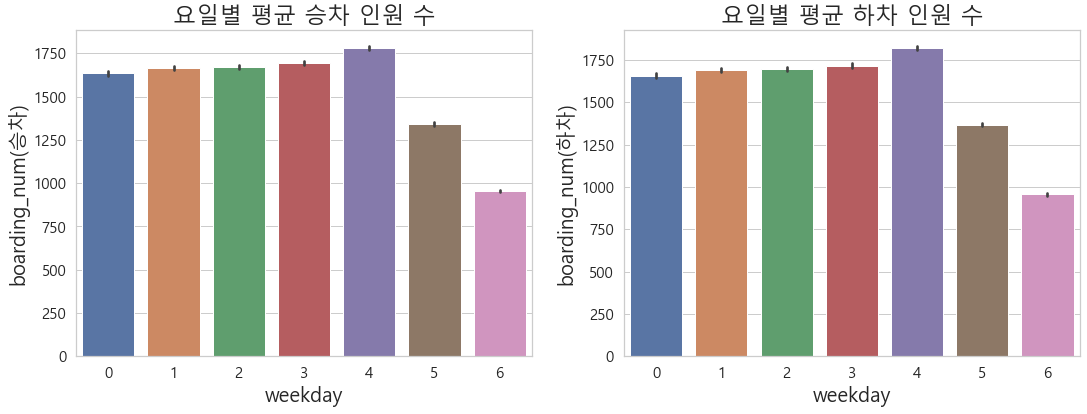

In [27]:
# 요일별 평균 승/하차 인원
draw_barplot('weekday', '요일')

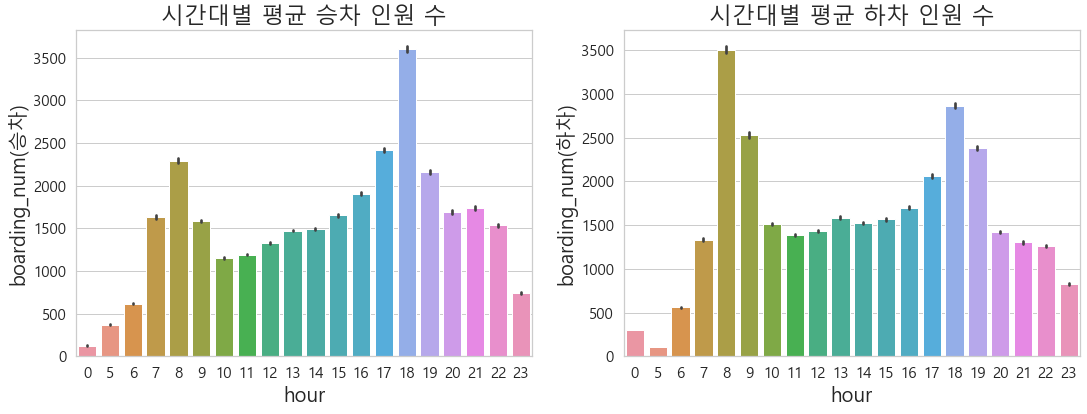

In [28]:
# 시간대별 평균 승/하차 인원
draw_barplot('hour', '시간대')

<결과 해석>
1. 연도별 평균 승/하차 인원
    - 연도별 평균 승차 인원 수와 하차 인원 수는 거의 비슷한 것을 확인할 수 있다.
2. 월별 평균 승/하차 인원
    - 월별 평균 승차 인원 수와 하차 인원 수는 거의 비슷한 것을 확인할 수 있다.
    - 하지만 월별로 평균 승/하차 인원 수가 조금씩 다른 것을 확인할 수 있다.
        - 2월이 평균 승/하차 인원 수가 가장 적고, 4월과 11월이 비교적 많은 것을 알 수 있다.
3. 일별 평균 승/하차 인원
    - 일별 평균 승차 인원 수와 하차 인원 수는 거의 비슷한 것을 확인할 수 있다.
    - 그리고 마찬가지로 일별로 평균 승/하차 인원 수가 조금씩 다른 것을 확인할 수 있다.
4. 요일별 평균 승/하차 인원
    - 사람들이 출근하는 월요일 ~ 금요일은 평균 승/하차 인원 수가 많지만, 주말에는 평균 승/하차 인원 수가 적음을 알 수 있다.
        - 따라서 평일과 주말을 구분해주는 변수를 하나 만들어주도록 하겠다.
    - 또한 금요일이 다른 평일에 비해 평균 승/하차 인원 수가 많은데, 이는 흔히들 말하는 "불금"을 즐기러 나오는 사람들이 많기 때문이라고 생각된다.
5. 시간대별 평균 승/하차 인원
    - 역시나 출/퇴근 시간대인 7 ~ 9시와 17 ~ 19시에 평균 승/하차 인원 수가 매우 많다.
    - 출/퇴근 시간대를 제외한 나머지 시간대 중에는 13 ~ 16시에 비교적 평균 승/하차 인원 수가 많은 것을 알 수 있다.
        - 따라서 시간대를 4개의 그룹으로 그룹화하도록 하겠다.
            - 오전: 7 ~ 11시
            - 오후: 12 ~ 16시
            - 저녁: 17 ~ 21시
            - 심야: 22 ~ 00시 + 5 ~ 6시
    - 한 가지 특이한 점은 출근 시간대(7 ~ 9시)에는 하차 인원 수가 승차 인원 수에 비해 많고, 퇴근 시간대(17 ~ 18시)에는 승차 인원 수가 하차 인원 수에 비해 많다는 것이다.

## 주말 여부(is_weekend) 변수 생성 및 시각화
- 앞서 평일과 주말 여부에 따라 지하철 승/하차 인원 수 차이가 많이 나는 것을 확인했다.
- 따라서 평일과 주말을 구분해주는 변수를 하나 만들어 준 뒤, 주말 여부(is_weekend)별 평균 승/하차 인원을 시각화해보겠다.
    - 0: 평일
    - 1: 주말

In [29]:
def make_is_weekend(x):
    if x in [5, 6]:
        return 1 # 주말
    else:
        return 0 # 평일
    
df_train['is_weekend'] = df_train['weekday'].apply(make_is_weekend)
df_train['is_weekend'] = df_train['is_weekend'].astype('category') # int to category

df_test['is_weekend'] = df_test['weekday'].apply(make_is_weekend)
df_test['is_weekend'] = df_test['is_weekend'].astype('category') # int to category

df_train.is_weekend.value_counts()

0    1044000
1     416000
Name: is_weekend, dtype: int64

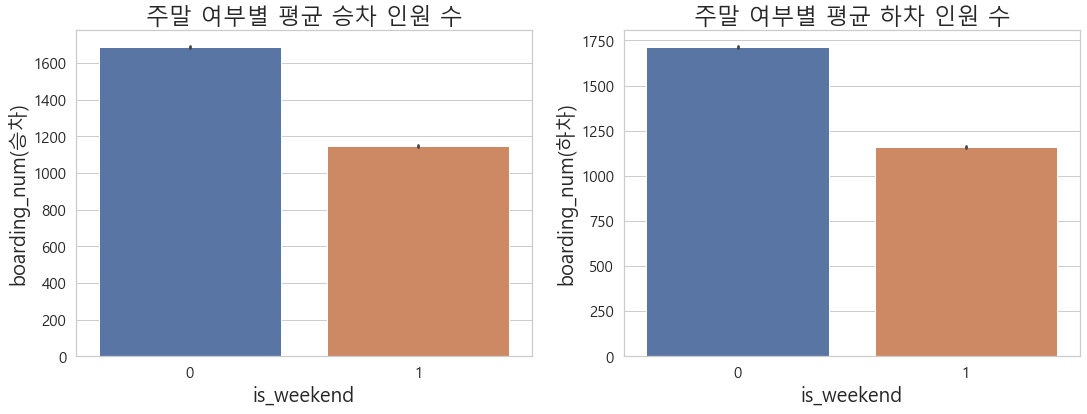

In [30]:
# 주말 여부별 평균 승/하차 인원
draw_barplot('is_weekend', '주말 여부')

- 결과를 살펴보면, 확실히 평일의 평균 승/하차 인원 수가 주말보다 많음을 확인할 수 있다.

## 시간대(hour) 변수를 그룹화한 특정 시간대(time) 변수 생성 및 시각화
- 앞서 특정 시간대에 따라 지하철 승/하차 인원 수 차이가 많이 나는 것을 확인했다.
- 따라서 시간(hour) 변수를 4개의 그룹으로 그룹화 한 뒤, 특정 시간대별(time) 평균 승/하차 인원을 시각화해보겠다.
    - 오전: 7 ~ 11시
    - 오후: 12 ~ 16시
    - 저녁: 17 ~ 21시
    - 심야: 22 ~ 00시 + 5 ~ 6시

In [31]:
def maek_time(x):
    if x >= 7 and x <= 11:
        return '오전'
    elif x >= 12 and x <= 16:
        return '오후'
    elif x >= 17 and x <= 21:
        return '저녁'
    else:
        return '심야'
    
df_train['time'] = df_train['hour'].apply(maek_time)
df_train['time'] = df_train['time'].astype('category') # object to category

df_test['time'] = df_test['hour'].apply(maek_time)
df_test['time'] = df_test['time'].astype('category') # object to category

df_train.time.value_counts()

저녁    365000
오후    365000
오전    365000
심야    365000
Name: time, dtype: int64

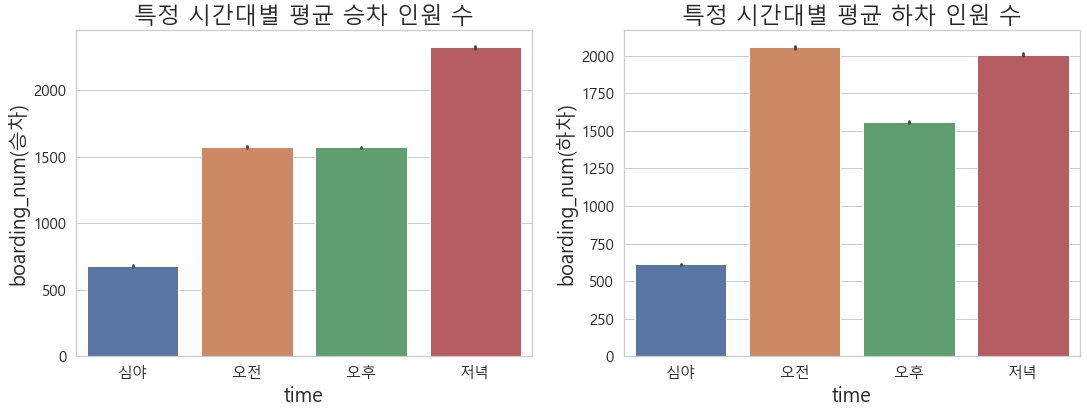

In [32]:
# 특정 시간대별 평균 승/하차 인원
draw_barplot('time', '특정 시간대')

- 앞서 말했듯이 오전 시간대에는 하차 인원이 승차 인원에 비해 많으며, 저녁 시간대에는 승차 인원이 하차 인원에 비해 많다.
- 또한 확실히 특정 시간대별로 평균 승/하차 인원 수의 차이가 있음을 알 수 있다.

## Pointplot
- 편리성을 위해 pointplot을 그려주는 함수를 새로 하나 만들어서, 아래의 5가지 경우에 대한 pointplot을 그려보겠다.
    1. 월별 연도별 평균 승/하차 인원
    2. 요일별 연도별 평균 승/하차 인원
    3. 시간대별 요일별 평균 승/하차 인원
    4. 시간대별 주말 여부별 평균 승/하차 인원
    5. 특정 시간대별 요일별 평균 승/하차 인원
    6. 특정 시간대별 주말 여부별 평균 승/하차 인원

In [33]:
def draw_pointplot(colname, hue_col, title1, title2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))
    
    # plot 그리기
    sns.pointplot(x = colname, y = 'boarding_num', hue = hue_col, 
                  data = df_train[df_train['boarding'] == '승차'], ax = ax1)
    sns.pointplot(x = colname, y = 'boarding_num', hue = hue_col, 
                  data = df_train[df_train['boarding'] == '하차'], ax = ax2)

    # title 설정
    ax1.set_title('{}별 {}별 평균 승차 인원 수'.format(title1, title2), fontsize = 23)
    ax2.set_title('{}별 {}별 평균 하차 인원 수'.format(title1, title2), fontsize = 23)

    # xlabel, ylabel 설정
    ax1.set_xlabel(colname, fontsize = 20)
    ax1.set_ylabel('boarding_num(승차)', fontsize = 20)
    ax2.set_xlabel(colname, fontsize = 20)
    ax2.set_ylabel('boarding_num(하차)', fontsize = 20)

    # tick 설정
    ax1.tick_params(labelsize = 15)
    ax2.tick_params(labelsize = 15)

    plt.show()

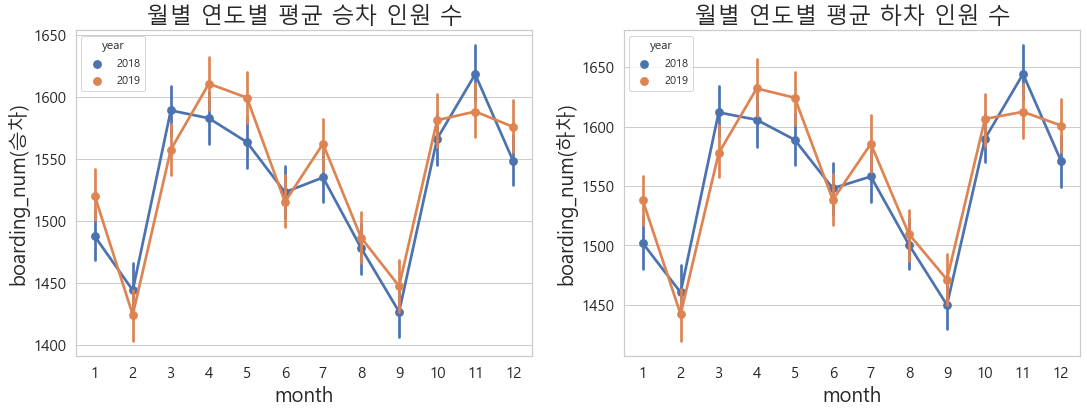

In [34]:
# 월별 연도별 평균 승/하차 인원
draw_pointplot('month', 'year', '월', '연도')

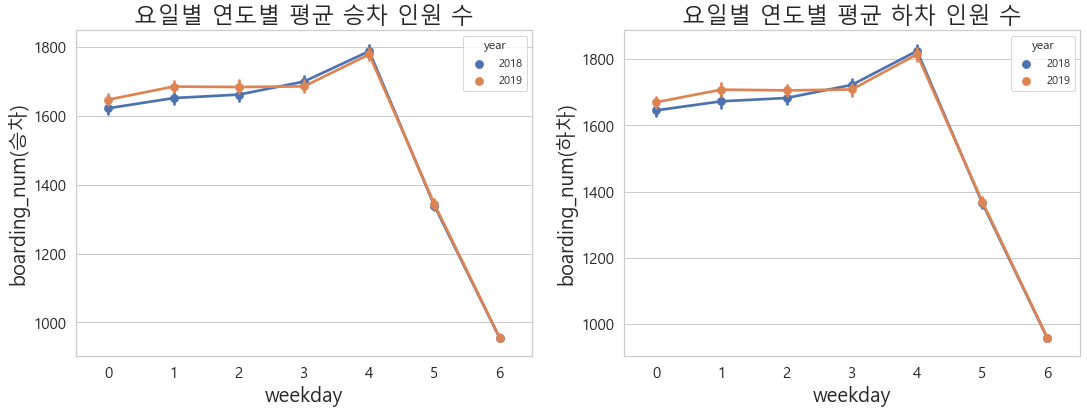

In [35]:
# 요일별 연도별 평균 승/하차 인원
draw_pointplot('weekday', 'year', '요일', '연도')

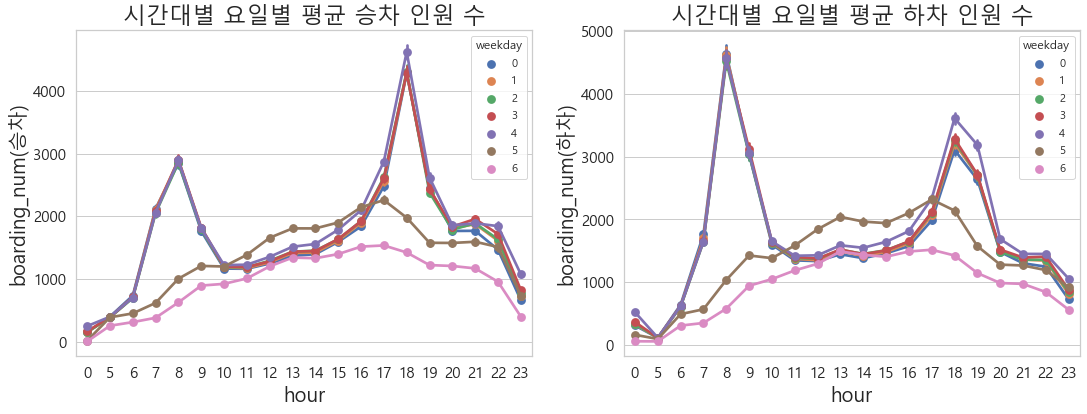

In [36]:
# 시간대별 요일별 평균 승/하차 인원
draw_pointplot('hour', 'weekday', '시간대', '요일')

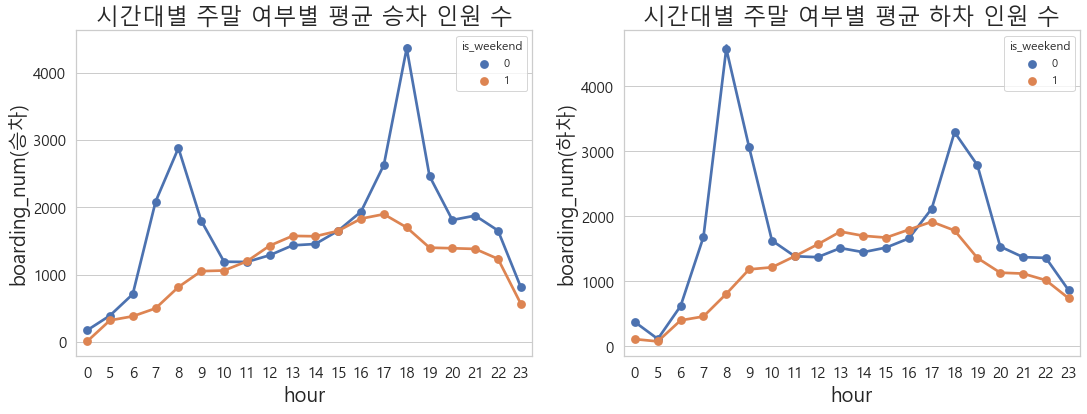

In [37]:
# 시간대별 주말 여부별 평균 승/하차 인원
draw_pointplot('hour', 'is_weekend', '시간대', '주말 여부')

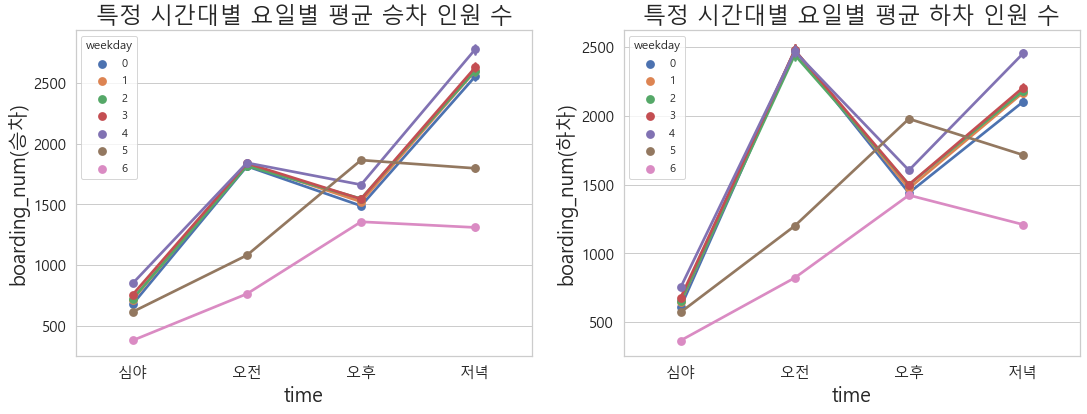

In [38]:
# 특정 시간대별 요일별 평균 승/하차 인원
draw_pointplot('time', 'weekday', '특정 시간대', '요일')

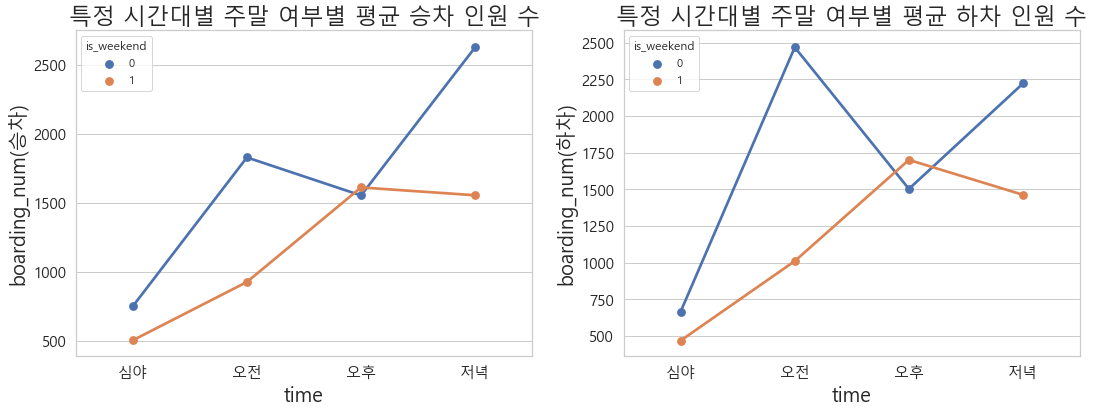

In [39]:
# 특정 시간대별 주말 여부별 평균 승/하차 인원
draw_pointplot('time', 'is_weekend', '특정 시간대', '주말 여부')

<결과 해석>
1. 월별 연도별 평균 승/하차 인원
    - 월별 평균 승/하차 인원 수는 연도에 따른 차이가 조금 존재한다.
        - 그러나 차이가 거의 없다고 봐도 무방할 것 같다.
    - 봄/가을에 가까운 월은 비교적 승/하차 인원 수가 많으며, 여름/겨울에 가까운 월은 비교적 승/하차 인원 수가 적음을 알 수 있다.
    - 따라서 월(month) 변수를 범주화하여 계절(season) 변수를 만들어주는 것이 좋아보인다.
2. 요일별 연도별 평균 승/하차 인원
    - 요일별 평균 승/하차 인원 수는 연도에 따른 차이가 거의 존재하지 않음을 알 수 있다.
    - 마찬가지로 평일에 비해 주말의 평균 승/하차 인원 수가 적음을 알 수 있다.
3. 시간대별 요일별 평균 승/하차 인원
    - 평일과 주말 여부에 따라 시간대별 평균 승/하차 인원 수가 확연히 다른 것을 확인할 수 있다.
        - 평일에는 출/퇴근 시간대에 승/하차 인원 수가 매우 많다.
        - 반면, 주말에는 주로 오후 시간대(13 ~ 17시)에 비교적 승/하차 인원 수가 많다.
    - 앞과 동일하게 출근 시간대(7 ~ 9시)에는 하차 인원 수가 승차 인원 수에 비해 많고, 퇴근 시간대(17 ~ 18시)에는 승차 인원 수가 하차 인원 수에 비해 많다.
4. 시간대별 주말 여부별 평균 승/하차 인원
    - 마찬가지로 평일과 주말 여부에 따라 시간대별 평균 승/하차 인원 수가 다른 패턴을 보이는 것을 확인할 수 있다.
5. 특정 시간대별 요일별 평균 승/하차 인원
    - 시간대를 4개의 그룹으로 그룹화해서 살펴보니, 요일별 평균 승/하차 인원 수 차이를 확연히 알 수 있다.
6. 특정 시간대별 주말 여부별 평균 승/하차 인원
    - 마찬가지로 평일과 주말 여부에 따라 평균 승/하차 인원 수가 보이는 패턴이 다름을 알 수 있다.

## 계절(season) 변수 생성 및 시각화
- 앞서 월(month)에 따라 승/하차 인원 수가 다름을 확인했다.
- 따라서 월(month) 변수를 범주화하여 계절(season) 변수를 생성한 뒤, 계절별 평균 승/하차 인원을 시각화해보겠다.
    - spring: 3 ~ 5월
    - summer: 6 ~ 8월
    - autumn: 9 ~ 11월
    - winter: 12 ~ 2월

In [40]:
def make_season(x):
    if x in [3, 4, 5]:
        return 'spring'
    elif x in [6, 7, 8]:
        return 'summer'
    elif x in [9, 10, 11]:
        return 'autumn'
    else:
        return 'winter'
    
df_train['season'] = df_train['month'].apply(make_season)
df_train['season'] = df_train['season'].astype('category') # object to category

df_test['season'] = df_test['month'].apply(make_season)
df_test['season'] = df_test['season'].astype('category') # object to category

df_train.season.value_counts()

summer    368000
spring    368000
autumn    364000
winter    360000
Name: season, dtype: int64

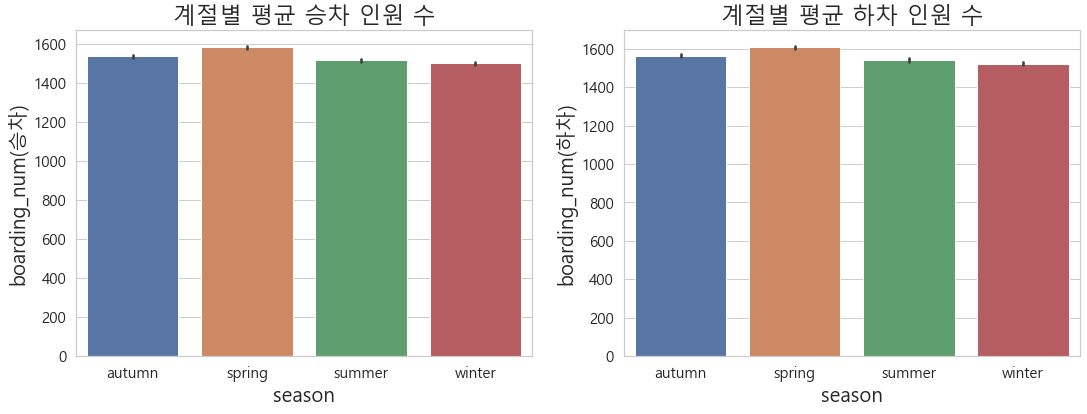

In [41]:
# 계절별 평균 승/하차 인원
draw_barplot('season', '계절')

- 앞서 말했듯이 봄/가을에 비교적 승/하차 인원 수가 많고, 여름/겨울에 비교적 승/하차 인원 수가 적음을 확인할 수 있다.

## 범주형 변수별 평균 승/하차 인원
- 아래와 같이 날짜 관련 변수들을 제외한 나머지 2가지 범주형 변수들에 대해 평균 승/하차 인원 수를 살펴보겠다.
    1. 타입별 평균 승/하차 인원
    2. 층별 평균 승/하차 인원

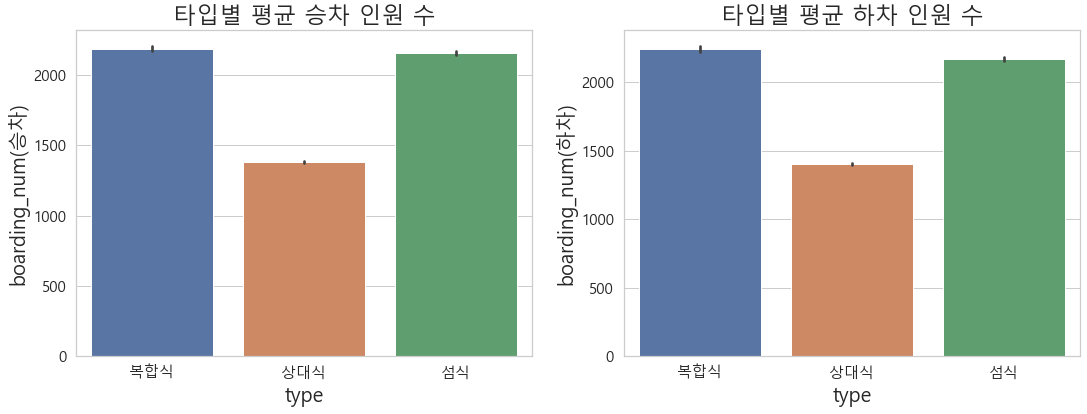

In [42]:
# 타입별 평균 승/하차 인원
draw_barplot('type', '타입')

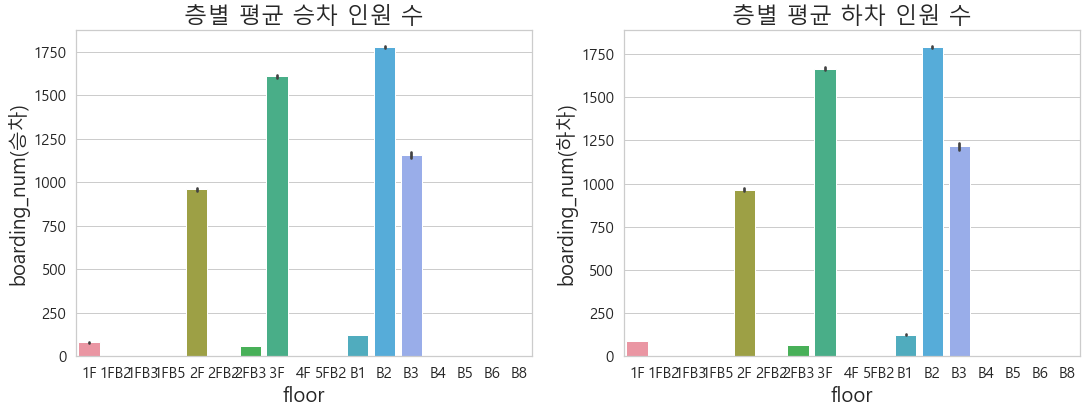

In [43]:
# 층별 평균 승/하차 인원
draw_barplot('floor', '층')

<결과 해석>
1. 타입별 평균 승/하차 인원
    - 타입별로 평균 승/하차 인원 수가 조금 다른 것을 확인할 수 있다.
        - "복합식"이 비교적 평균 승/하차 인원 수가 많고, "상대식"이 비교적 적음을 알 수 있다.
2. 층별 평균 승/하차 인원
    - 지하철 역마다 구성된 층수가 다른데, 층별로 평균 승/하차 인원 수에 차이가 있음을 확인할 수 있다.
        - "지하 2층, 지상 3층, 지하 3층, 지상 2층"으로 구성된 지하철 역이 다른 곳들에 비해 평균 승/하차 인원 수가 압도적으로 높다. 

## 연속형 변수들 간 상관관계 확인

In [44]:
cont_var = df_train[['boarding_num', 'waiting_area', 'platform_area', 'length', 'transfer_num', 'entrance', 
                     'msi_cnt', 'hsi_cnt', 'uvi_cnt', 'hpi_cnt', 'mti_cnt', 'temp', 'windspeed', 'rain', 
                     'total', 'pop_below_20', 'pop_20', 'pop_30', 'pop_40', 'pop_50', 'pop_60', 'pop_over_70']]
corr_mat = cont_var.corr()

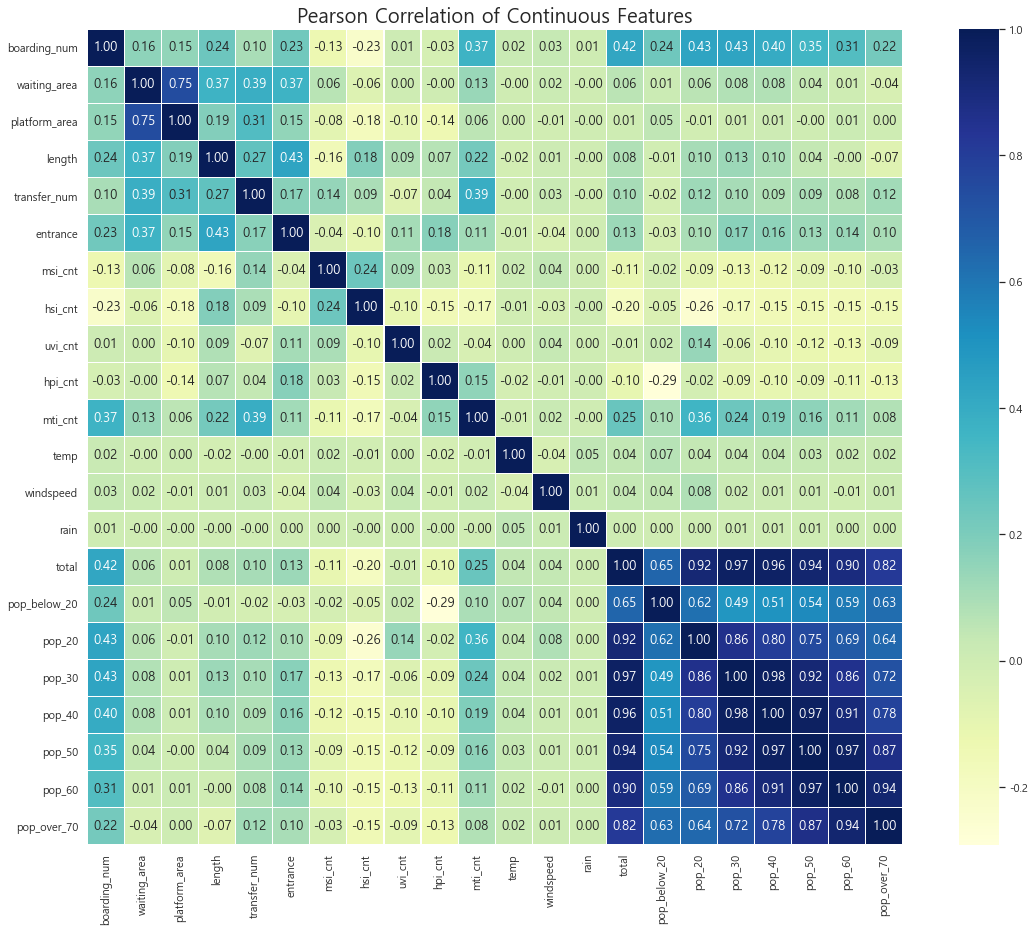

In [45]:
plt.figure(figsize = (20, 15))
plt.title('Pearson Correlation of Continuous Features', size = 20)

sns.heatmap(corr_mat, cmap = 'YlGnBu', fmt = '.2f',
            linewidth = 0.1, linecolor = 'white', square = True,
            annot = True, annot_kws = {'size': 13})

<결과 해석>
- 타겟 변수인 boarding_num과의 상관계수가 비교적 높게 나온 변수들은 다음과 같다.
    - length, entrance, hsi_cnt, mti_cnt, total, pop_below_20, pop_20, pop_30, pop_40, pop_50, pop_60, pop_over_70
- 그리고 waiting_area와 platform_area 변수 간의 상관계수가 매우 높다. 이러한 경우에는 다중공선성 문제가 발생하므로, 이에 대한 처리가 필요하다.
    - 따라서 대합실 면적을 의미하는 waiting_area 대신, 승강장 면적을 의미하는 platform_area 변수만 사용하도록 하겠다.
- 또한 인구 데이터 관련 변수들의 경우, 서로 간 상관계수가 매우 높다. 이러한 경우에는 다중공선성 문제가 발생하므로, 이에 대한 처리가 필요하다.
    - 먼저 전체 인구 수를 의미하는 total 변수를 사용하는 것보다, 연령대별 인구 수 변수들을 사용하는 것이 더 효율적이라고 판단된다.
        - 따라서 total 변수는 제외시키도록 하겠다.
    - 다음으로 heatmap 결과를 통해, 타겟 변수인 boarding_num과의 상관계수가 0.3 이상인 변수들은 20대, 30대, 40대 변수임을 알 수 있다.
        - 따라서 인구 데이터 관련 변수들을 다음과 같이 3개의 그룹으로 묶어주도록 하겠다.
            - 그룹 1: 20세 미만
            - 그룹 2: 20대 + 30대 + 40대
            - 그룹 3: 50세 이상

In [46]:
# waiting_area 변수 제거
df_train.drop(['waiting_area'], axis = 1, inplace = True)
df_test.drop(['waiting_area'], axis = 1, inplace = True)

In [47]:
# 20대 + 30대 + 40대
df_train['pop_20_30_40'] = df_train['pop_20'] + df_train['pop_30'] + df_train['pop_40']
df_test['pop_20_30_40'] = df_test['pop_20'] + df_test['pop_30'] + df_test['pop_40']
# 50세 이상
df_train['pop_over_50'] = df_train['pop_50'] + df_train['pop_60'] + df_train['pop_over_70']
df_test['pop_over_50'] = df_test['pop_50'] + df_test['pop_60'] + df_test['pop_over_70']

In [48]:
cont_var = df_train[['boarding_num', 'platform_area', 'length', 'transfer_num', 'entrance', 
                     'msi_cnt', 'hsi_cnt', 'uvi_cnt', 'hpi_cnt', 'mti_cnt', 'temp', 'windspeed', 'rain', 
                     'pop_below_20', 'pop_20_30_40', 'pop_over_50']]
corr_mat = cont_var.corr()

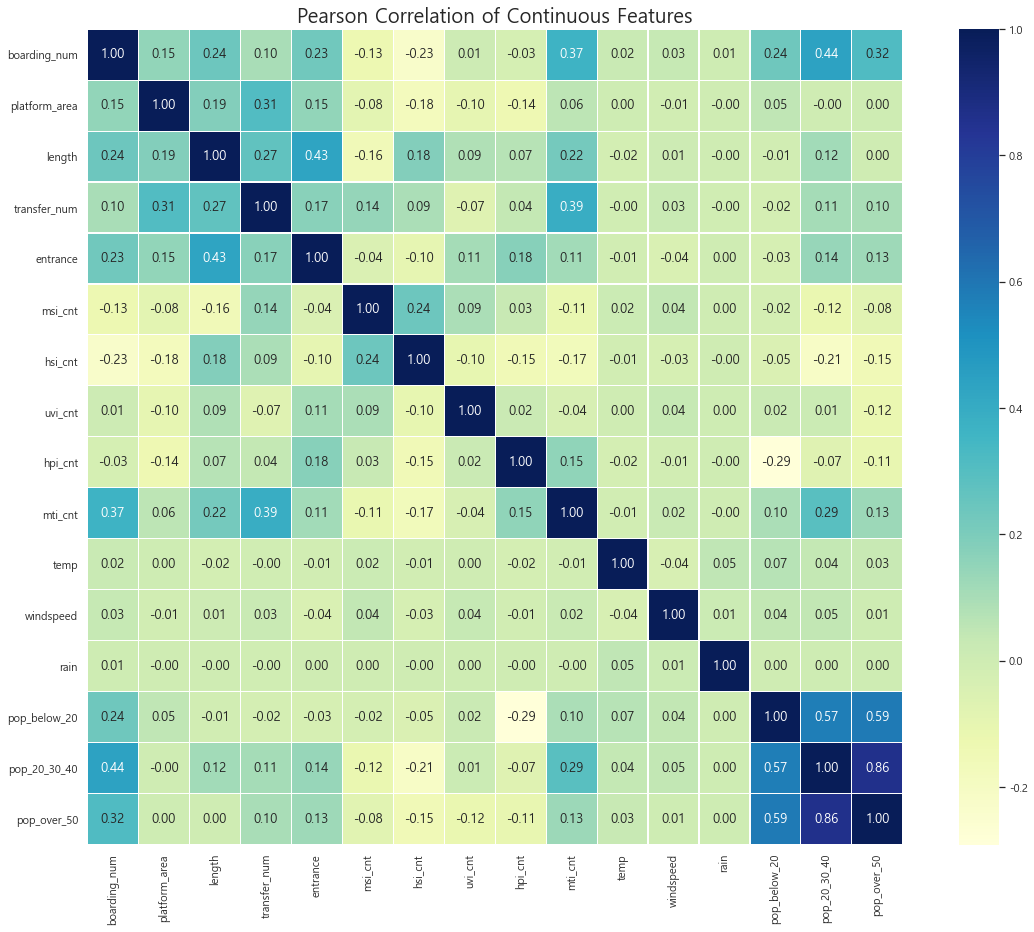

In [49]:
plt.figure(figsize = (20, 15))
plt.title('Pearson Correlation of Continuous Features', size = 20)

sns.heatmap(corr_mat, cmap = 'YlGnBu', fmt = '.2f',
            linewidth = 0.1, linecolor = 'white', square = True,
            annot = True, annot_kws = {'size': 13})
plt.show()

- 3개의 새로운 그룹으로 묶어준 뒤에 heatmap을 다시 그려보니, 인구 데이터 관련 변수들 간 상관계수가 낮아진 것을 확인할 수 있다.
    - 물론 여전히 20 ~ 40대 인구 수와 50세 이상 인구 수의 상관계수가 높지만, 이 두 변수를 하나로 보는 것보단 나눠서 각각의 변수로 두는 것이 해석적인 측면에서 더 올바르다고 판단하였다.
        - 만약 추후에 모델링 과정에서 pop_over_50 변수를 제거했을 때의 예측 성능이 더 좋다면, pop_over_50 변수는 모델에 넣어주지 않을 것이다.
    - 또한 주성분 분석(PCA)과 같이 차원 축소 기법을 통해 다중공선성 문제를 해결할 수 도 있으나, PCA를 사용해서 인구 데이터 관련 변수들의 차원을 축소시키면 추후에 해석적인 측면에서 문제가 발생할 것이라고 판단했기에 사용하지 않았다.
- 끝으로 기존의 "total, pop_20, pop_30, pop_40, pop_50, pop_60, pop_over_70" 변수들은 필요가 없으므로 모두 제거해주겠다.

In [50]:
df_train.drop(['total', 'pop_20', 'pop_30', 'pop_40', 'pop_50', 'pop_60', 'pop_over_70'], axis = 1, inplace = True)
df_test.drop(['total', 'pop_20', 'pop_30', 'pop_40', 'pop_50', 'pop_60', 'pop_over_70'], axis = 1, inplace = True)

# Feature Engineering

## 연속형 변수 Feature Scaling
- 먼저 타겟 변수인 boarding_num의 분포를 살펴보겠다.

In [51]:
def draw_distplot(cont_var, data):
    f, ax = plt.subplots(1, 2, figsize = (20, 5), squeeze = False)
    # plot 그리기
    sns.distplot(data[cont_var], label = 'Skewness: {:.2f}'.format(data[cont_var].skew()), 
                 ax = ax[0][0])
    sns.boxplot(x = cont_var, data = data, ax = ax[0][1])
    # xlabel 설정
    ax[0][0].set_xlabel('{}'.format(cont_var), fontsize = 20)
    ax[0][1].set_xlabel('{}'.format(cont_var), fontsize = 20)
    # tick 설정
    ax[0][0].tick_params(labelsize = 15)
    ax[0][1].tick_params(labelsize = 15)
    # legend 설정
    ax[0][0].legend(loc = 'best', fontsize = 20)

    plt.show()

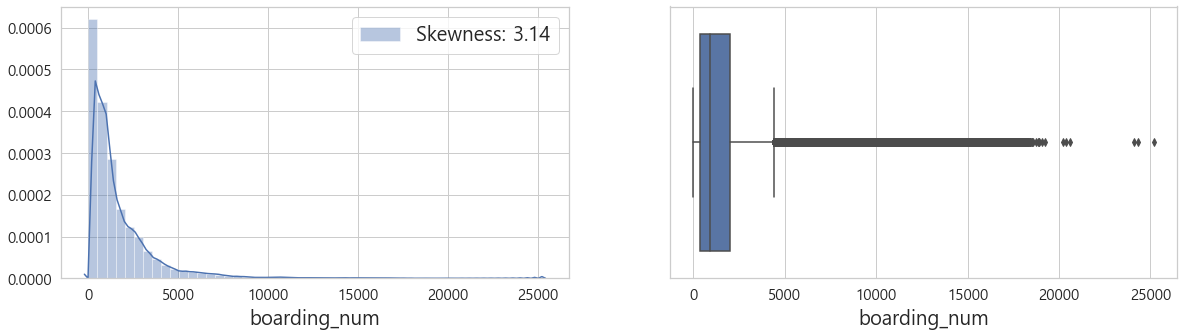

In [52]:
draw_distplot('boarding_num', df_train)

- 타겟 변수인 boarding_num(승/하차 인원)의 분포를 확인해보니, 승/하차 인원 수가 0인 값들이 존재한다.
- 따라서 이러한 0 값들에 대해서 자세히 살펴보도록 하겠다.

In [53]:
check_col = ['date', 'line', 'station_name', 'boarding', 'hour', 'gate', 'boarding_num']
df_zero_boarding = df_train[df_train['boarding_num'] == 0][check_col]
df_zero_boarding

,date,line,station_name,boarding,hour,gate,boarding_num
299520,2018-07-08,2호선,시청,승차,0,"8, 9, 10, 11, 12,",0
310720,2019-04-14,2호선,시청,승차,0,"8, 9, 10, 11, 12,",0
315480,2019-08-11,2호선,시청,승차,0,"8, 9, 10, 11, 12,",0
315760,2019-08-18,2호선,시청,승차,0,"8, 9, 10, 11, 12,",0
316560,2019-09-07,2호선,시청,승차,0,"8, 9, 10, 11, 12,",0
...,...,...,...,...,...,...,...
1749641,2019-11-03,2호선,용두(동대문구청),하차,0,"1, 2, 3, 4, 5",0
1750441,2019-11-23,2호선,용두(동대문구청),하차,0,"1, 2, 3, 4, 5",0
1750721,2019-11-30,2호선,용두(동대문구청),하차,0,"1, 2, 3, 4, 5",0
1751000,2019-12-07,2호선,용두(동대문구청),승차,0,"1, 2, 3, 4, 5",0


In [54]:
df_zero_boarding.hour.value_counts()

0     3776
23       4
5        1
6        1
Name: hour, dtype: int64

- 시간대를 보면 00시, 5시, 6시, 23시에 boarding_num 값이 0이다.
    - 해당 시간대는 늦거나 이른 새벽 시간대이므로 boarding_num 값이 0인 경우가 존재할 가능성이 높다.
- 따라서 위에 해당되는 경우들은 그냥 그대로 두도록 하겠다.
- 끝으로 앞서 치우친 분포를 보였던 boarding_num의 분포를 로그 변환을 통해 정규 분포 형태에 가깝게 만들어주겠다.

In [55]:
df_train['log_boarding_num'] = np.log1p(df_train['boarding_num'])

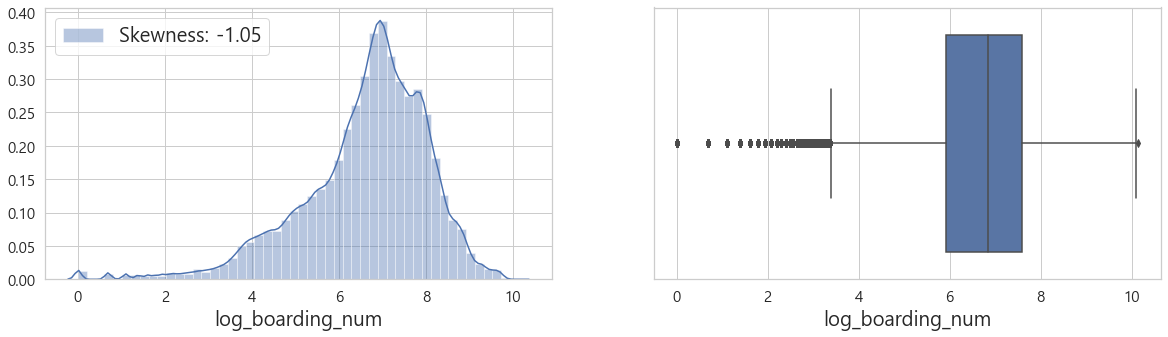

In [56]:
draw_distplot('log_boarding_num', df_train)

- 다음으로 타겟 변수를 제외한 나머지 연속형 변수들의 분포를 살펴보겠다.
    - platform_area
    - length
    - transfer_num
    - entrance
    - msi_cnt
    - hsi_cnt
    - uvi_cnt
    - hpi_cnt
    - mti_cnt
    - temp
    - windspeed
    - rain
    - pop_below_20
    - pop_20_30_40
    - pop_over_50

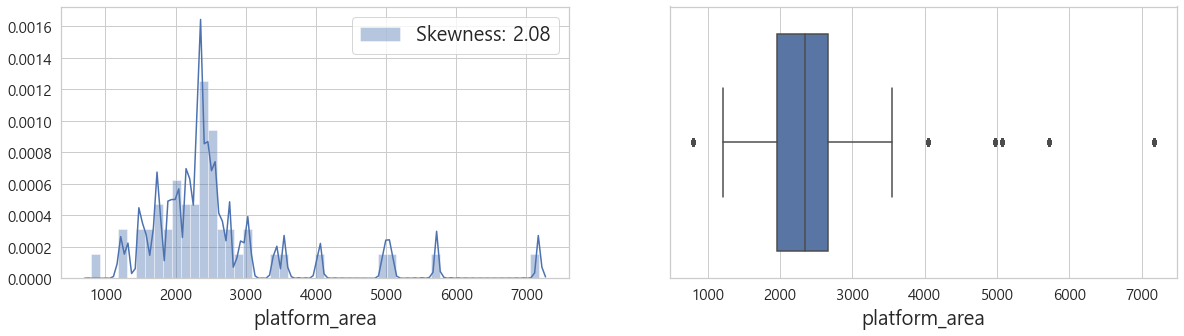

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


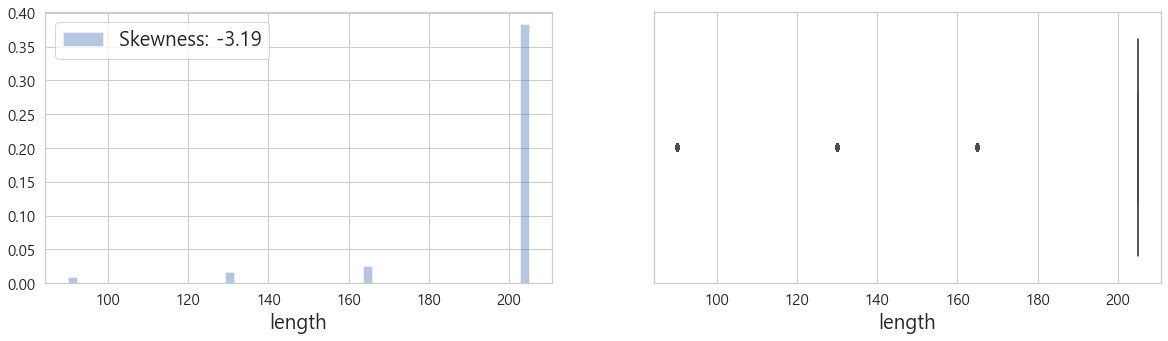

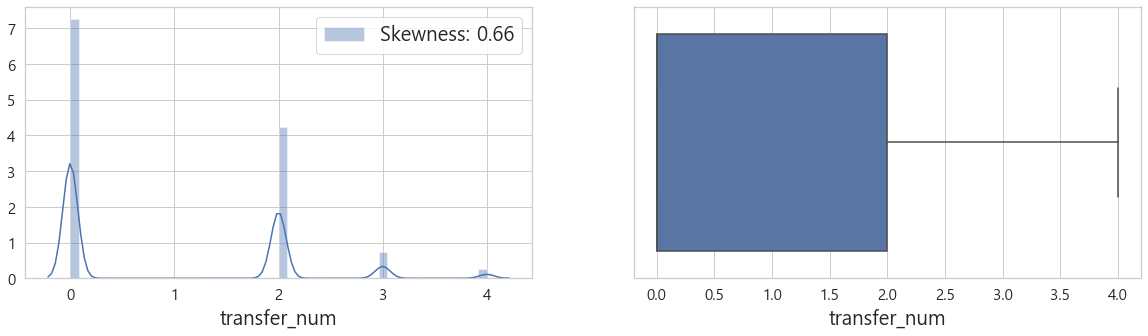

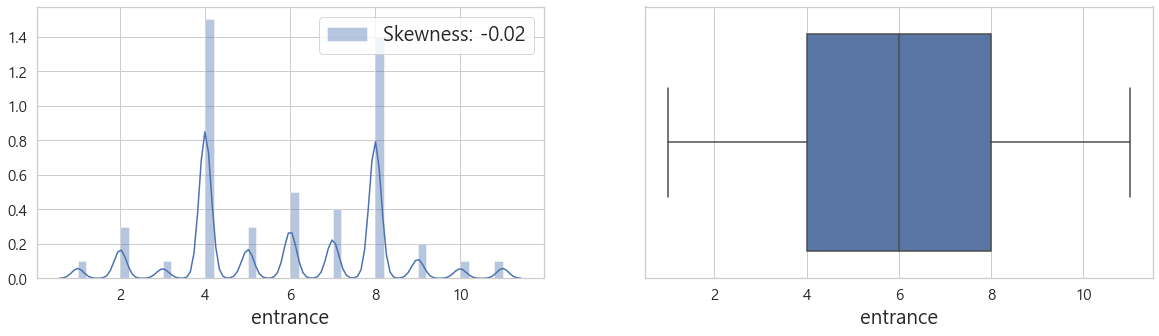

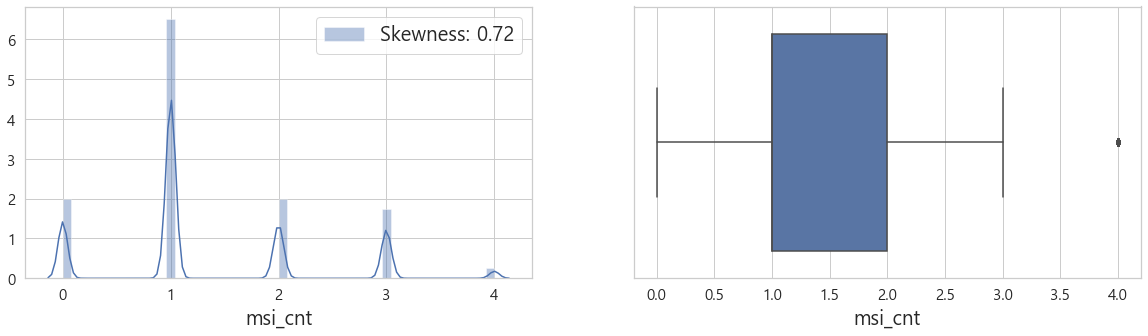

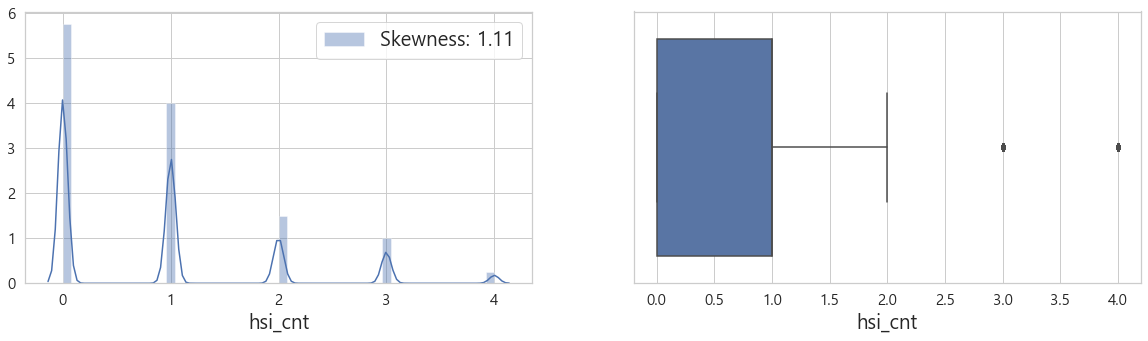

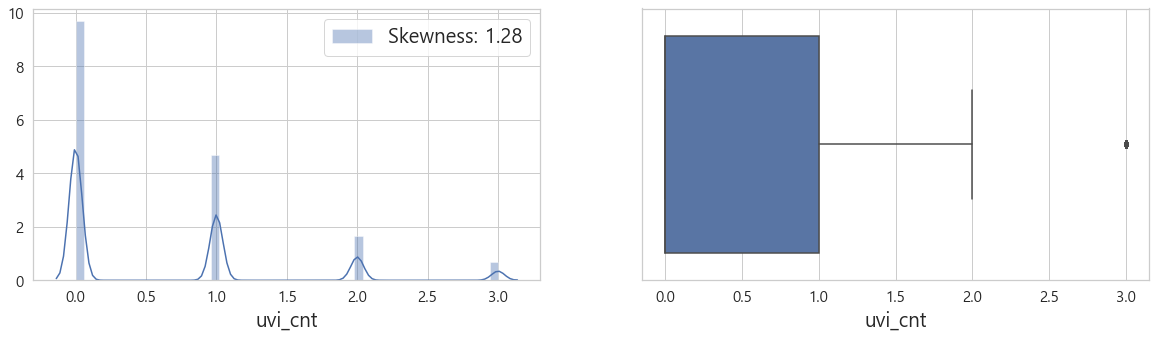

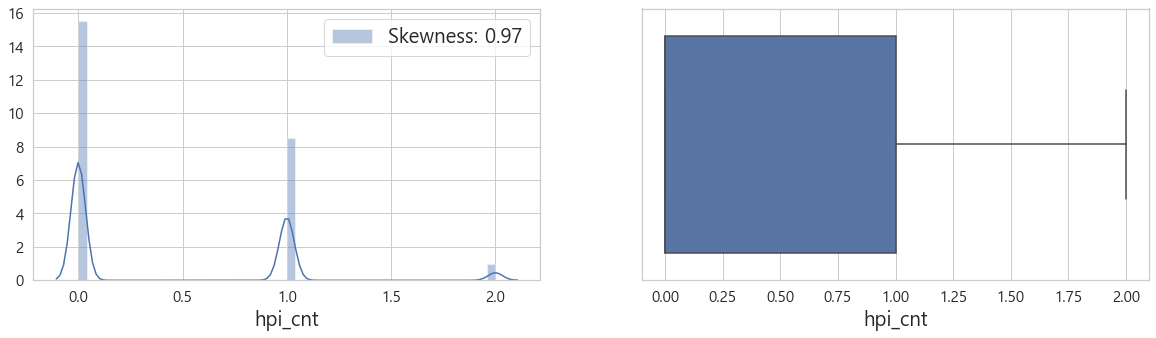

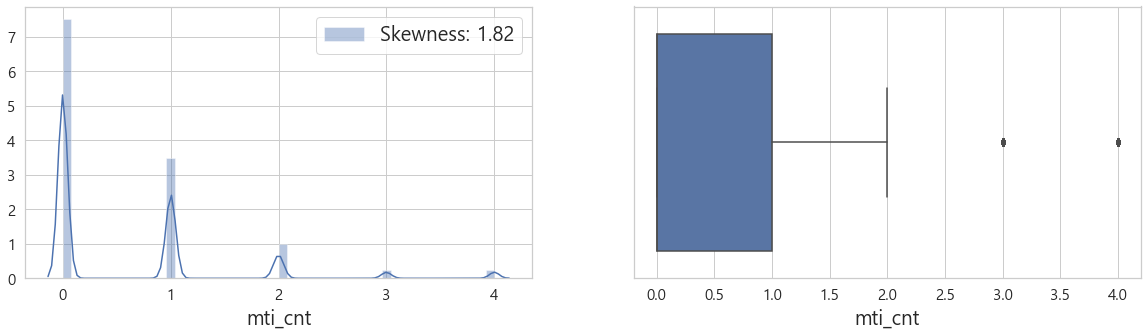

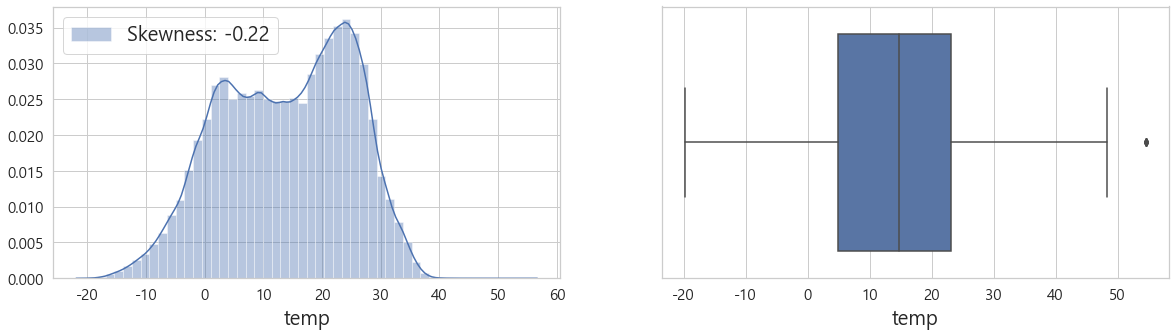

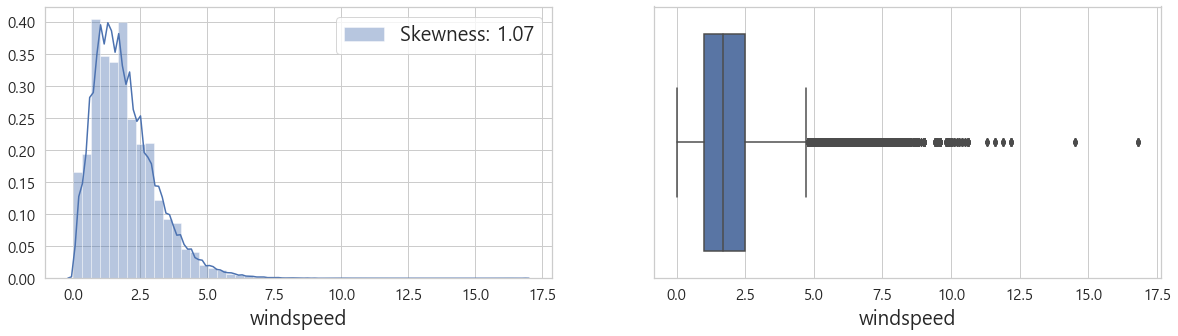

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


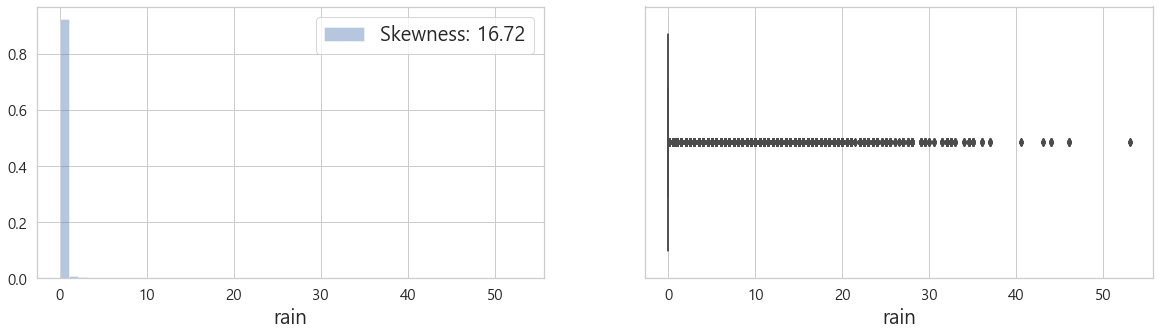

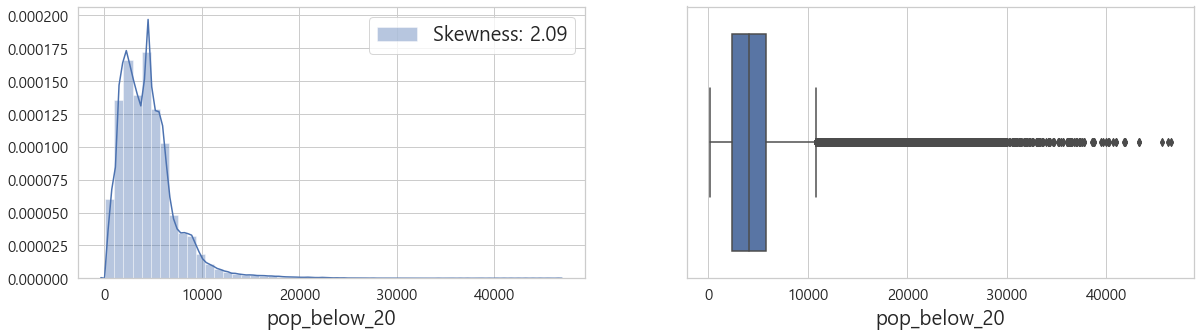

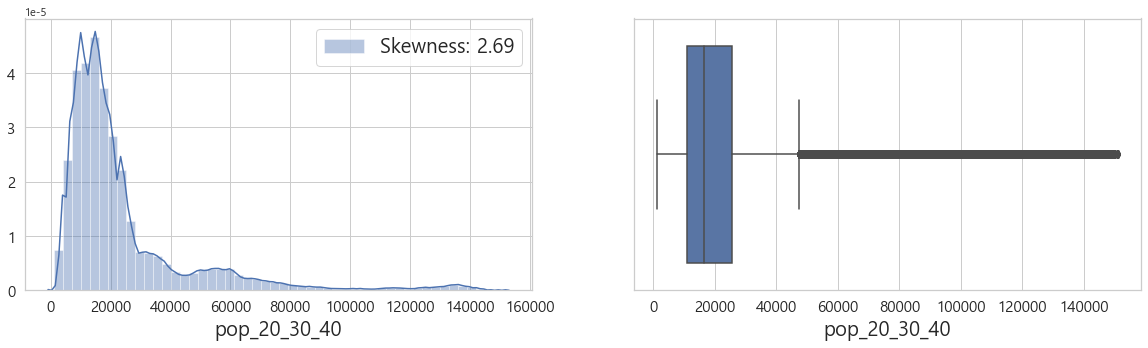

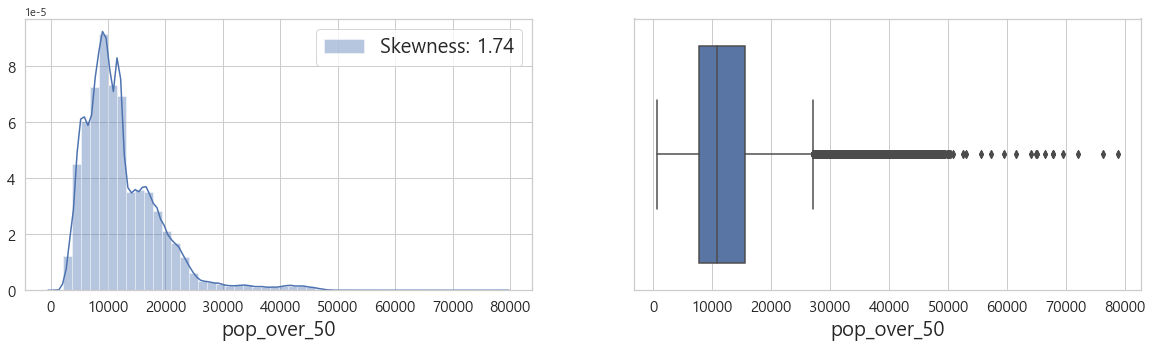

In [57]:
# 분포를 확인해 볼 연속형 변수들
cont_vars = ['platform_area', 'length', 'transfer_num', 'entrance', 
             'msi_cnt', 'hsi_cnt', 'uvi_cnt', 'hpi_cnt', 'mti_cnt',
             'temp', 'windspeed', 'rain', 'pop_below_20', 'pop_20_30_40', 'pop_over_50']

for cont_var in tqdm(cont_vars):
    draw_distplot(cont_var, df_train)

- Boxplot을 살펴보면 IQR 기준으로 이상치라고 판단되는 값들이 존재하는 것을 알 수 있지만, 해당 데이터들에 대한 처리는 따로 수행해주지 않겠다.
    - 왜냐하면 해당 자료들의 값들을 살펴보면, 잘못 기입했다고 하기에는 무리가 있어보이기 때문이다.
    - 따라서 IQR 기준 이상치라고 판단되는 값들일지라도 그대로 두도록 하겠다.
- 또한 연속형 변수들의 단위 차이가 많이 나는 것을 알 수 있는데, 선형 모델의 경우에는 이러한 부분이 문제가 될 수 있다.
    - 따라서 선형 모델에 사용할 연속형 변수들에 대하여, ```StandardScaler()```를 통해 scaling 작업을 수행해주도록 하겠다.
    - 비선형 모델에 사용할 연속형 변수들은 따로 scaling 처리를 해주지 않겠다.

In [58]:
# 선형 모델에 사용할 데이터 셋을 따로 생성
df_train_linear = df_train.copy()
df_test_linear = df_test.copy()

# Feature Scaling
scaler = StandardScaler()
scaler.fit(df_train_linear[cont_vars])
df_train_linear[cont_vars] = scaler.transform(df_train_linear[cont_vars])
df_test_linear[cont_vars] = scaler.transform(df_test_linear[cont_vars])

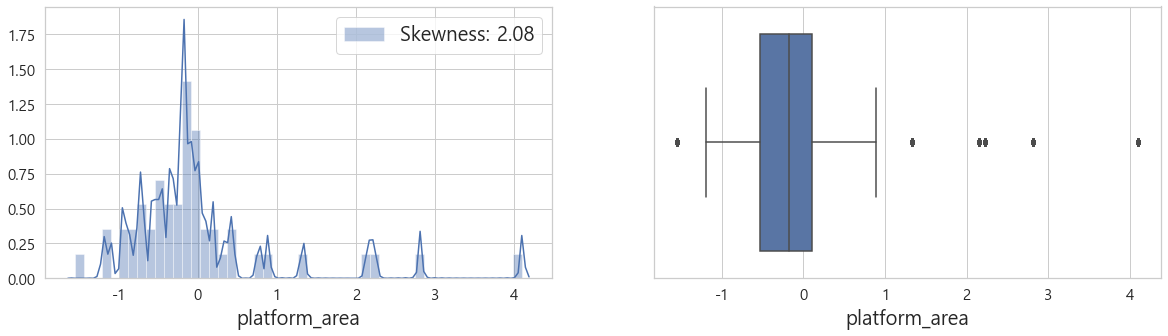

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


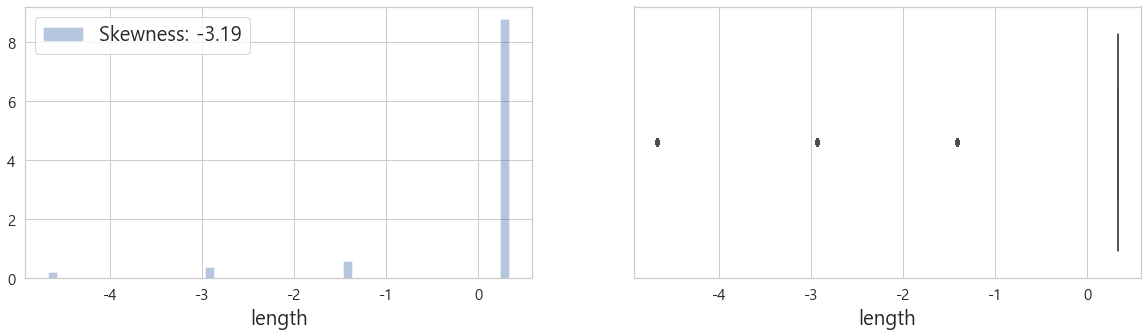

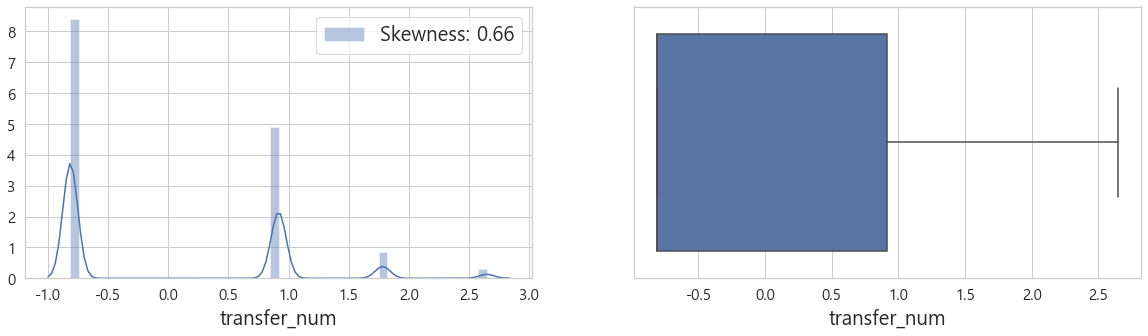

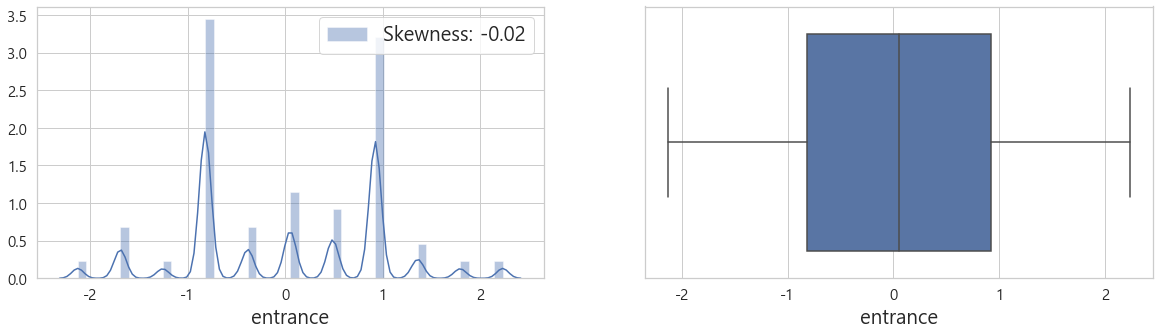

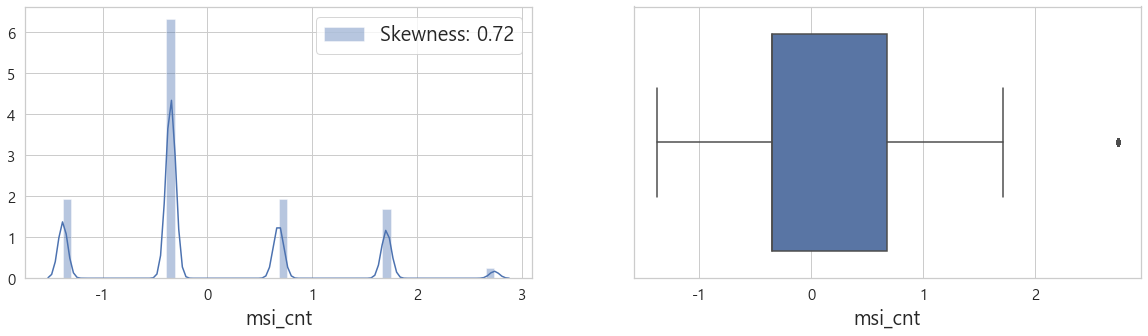

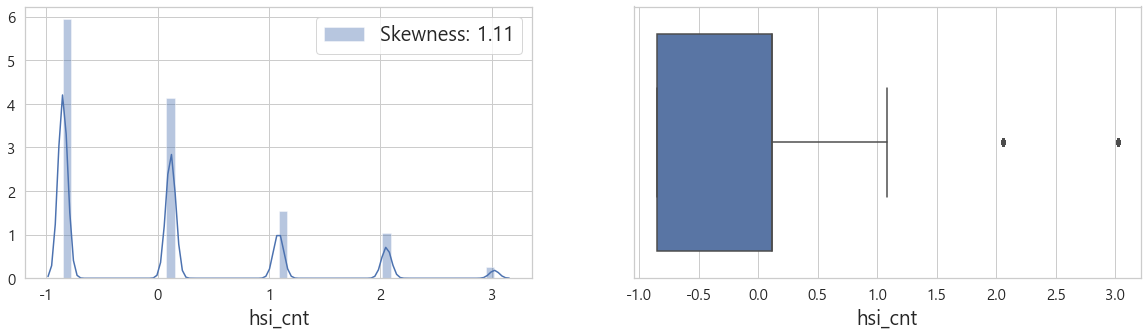

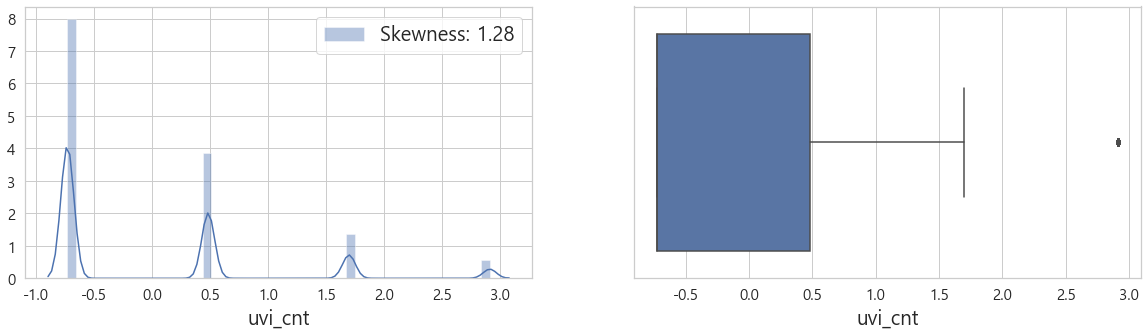

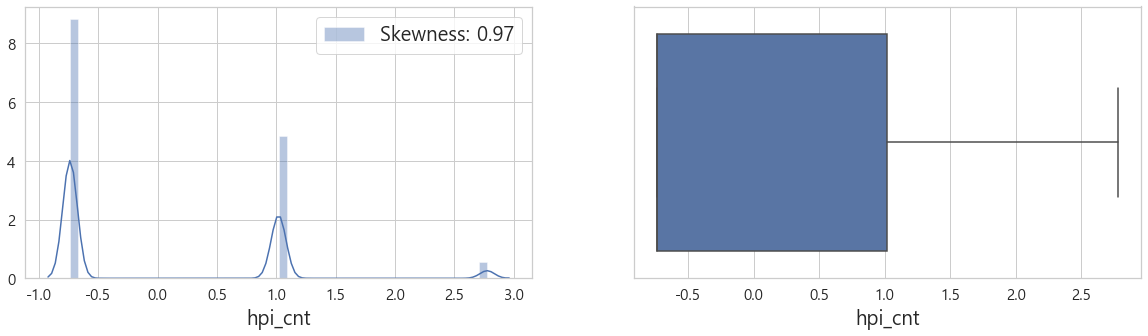

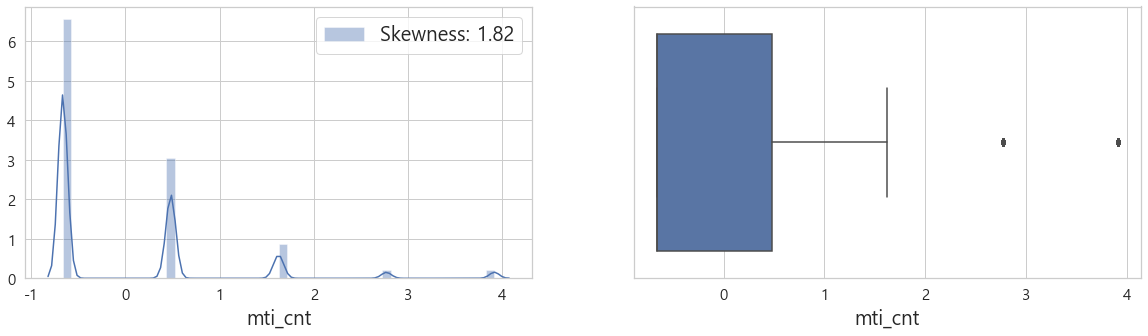

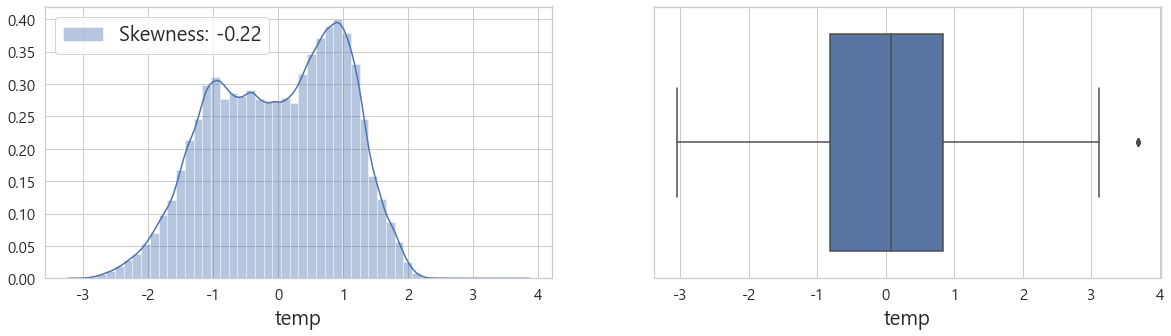

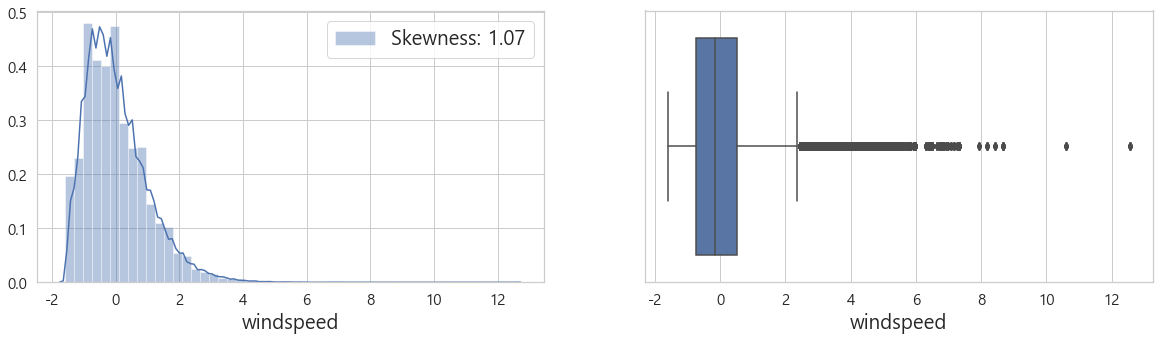

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


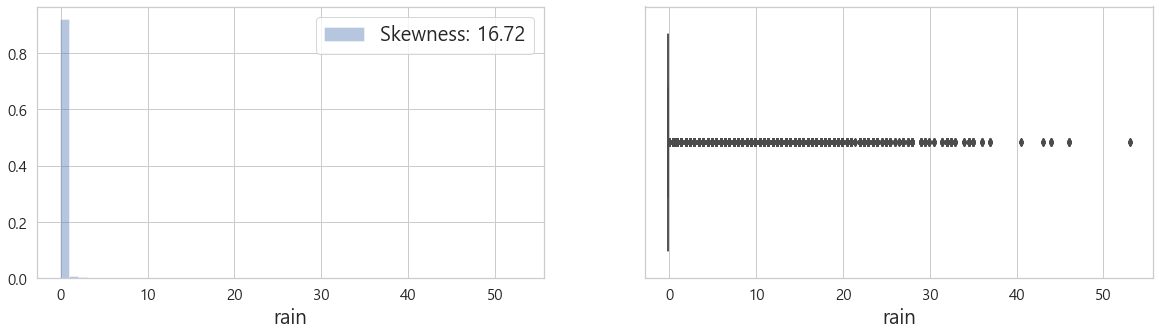

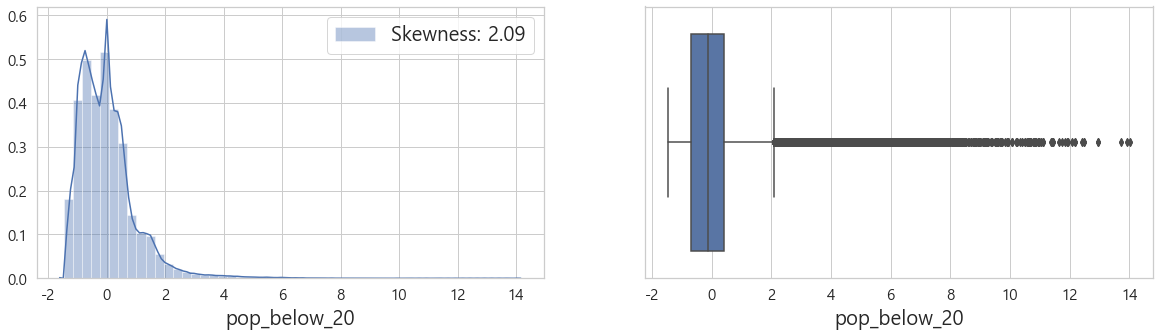

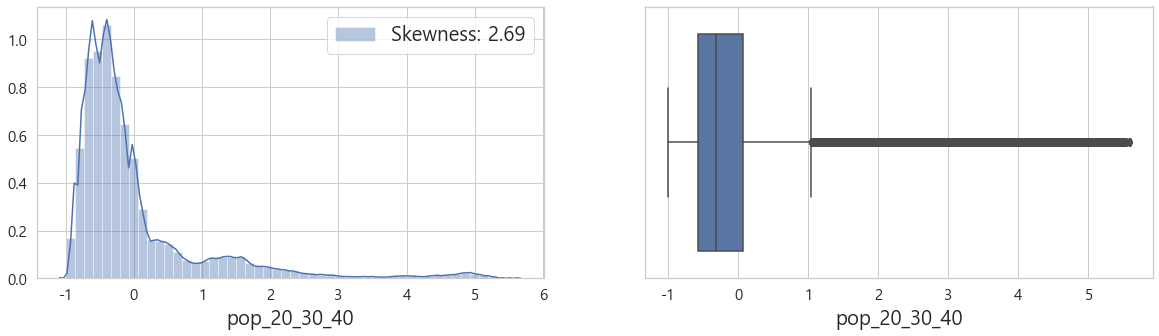

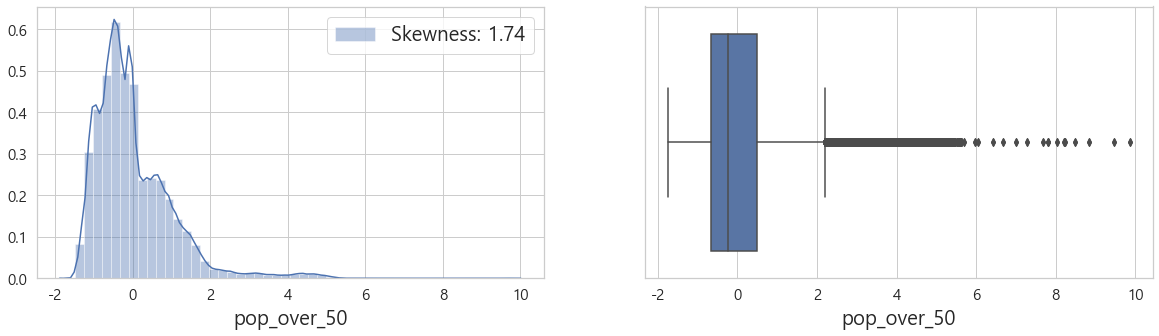

In [59]:
# 스케일링 후, 연속형 변수들의 분포 재확인
cont_vars_scaled = ['platform_area', 'length', 'transfer_num', 'entrance', 
                    'msi_cnt', 'hsi_cnt', 'uvi_cnt', 'hpi_cnt', 'mti_cnt',
                    'temp', 'windspeed', 'rain', 'pop_below_20', 'pop_20_30_40', 'pop_over_50']

for cont_var_scaled in tqdm(cont_vars_scaled):
    draw_distplot(cont_var_scaled, df_train_linear)

## 범주형 변수 Encoding
- Ont-Hot Encoding
    - boarding
    - gu
    - type
    - floor
    - year
    - month
    - hour
    - weekday
    - is_weekend
    - time
    - season

<참고>
- train dataset과 test dataset을 먼저 합쳐준 뒤에 One-Hot Encoding 수행하고, 그 다음에 다시 train dataset과 test dataset으로 분리해주겠다.
    - train dataset에는 존재하지만 test dataset에는 존재하지 않는 컬럼이 발생할 수 있기 때문에!!

In [60]:
# train dataset + test dataset
df_total_linear = pd.concat([df_train_linear, df_test_linear], axis = 0)
df_total_nonlinear = pd.concat([df_train, df_test], axis = 0)

print(df_total_linear.shape, df_total_nonlinear.shape)

(1824000, 35) (1824000, 35)


In [61]:
# One-Hot Encoding 처리를 수행해 줄 범주형 변수
one_hot_var = ['boarding', 'gu', 'type', 'floor', 
               'year', 'month', 'hour', 'weekday', 
               'is_weekend', 'time', 'season']

# Ont-Hot Encoding
for var in tqdm(one_hot_var):
    # 선형 모델에 사용할 데이터 셋
    df_total_linear = pd.get_dummies(df_total_linear, columns = [var], prefix = var)
    # 비선형 모델에 사용할 데이터 셋
    df_total_nonlinear = pd.get_dummies(df_total_nonlinear, columns = [var], prefix = var)

In [62]:
df_total_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824000 entries, 292000 to 436799
Columns: 123 entries, date to season_winter
dtypes: category(4), datetime64[ns](1), float64(16), int32(1), int64(1), object(1), uint8(99)
memory usage: 467.9+ MB


In [63]:
df_total_nonlinear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824000 entries, 292000 to 436799
Columns: 123 entries, date to season_winter
dtypes: category(4), datetime64[ns](1), float32(7), float64(1), int32(9), int64(1), object(1), uint8(99)
memory usage: 363.6+ MB


- 이제 합쳐준 전체 데이터 셋을 다시 분할시켜주겠다.
    - 앞서 train dataset에서 타겟 변수인 boarding_num을 로그 변환시켜 준 log_boarding_num 변수를 만들어주었다.
    - 때문에 test dataset에는 log_boarding_num 변수가 존재하지 않으므로, 이것을 기준으로 분할시켜주겠다.

In [64]:
# train/test dataset for linear model
df_train_linear = df_total_linear[~df_total_linear['log_boarding_num'].isnull()]
df_test_linear = df_total_linear[df_total_linear['log_boarding_num'].isnull()]

# train/test dataset for nonlinear model
df_train_nonlinear = df_total_nonlinear[~df_total_nonlinear['log_boarding_num'].isnull()]
df_test_nonlinear = df_total_nonlinear[df_total_nonlinear['log_boarding_num'].isnull()]

In [65]:
print(df_train_linear.shape, df_test_linear.shape, 
      df_train_nonlinear.shape, df_test_nonlinear.shape)

(1460000, 123) (364000, 123) (1460000, 123) (364000, 123)


# 불필요한 변수 제거
- transfer
- gate
- dong
- 또한 데이터 결합 과정에서 test dataset에 생긴 log_boarding_num 변수는 제거해주도록 하겠다.

In [66]:
# 선형 모델에 사용할 데이터 셋
df_train_linear.drop(['transfer', 'gate', 'dong'], axis = 1, inplace = True)
df_test_linear.drop(['transfer', 'gate', 'dong', 'log_boarding_num'], axis = 1, inplace = True)

# 비선형 모델에 사용할 데이터 셋
df_train_nonlinear.drop(['transfer', 'gate', 'dong'], axis = 1, inplace = True)
df_test_nonlinear.drop(['transfer', 'gate', 'dong', 'log_boarding_num'], axis = 1, inplace = True)

C:\Users\Brian\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
print(df_train_linear.shape, df_test_linear.shape, 
      df_train_nonlinear.shape, df_test_nonlinear.shape)

(1460000, 120) (364000, 119) (1460000, 120) (364000, 119)


In [68]:
df_train_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460000 entries, 292000 to 1751999
Columns: 120 entries, date to season_winter
dtypes: category(2), datetime64[ns](1), float64(16), int32(1), int64(1), uint8(99)
memory usage: 359.2 MB


In [69]:
df_test_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364000 entries, 72800 to 436799
Columns: 119 entries, date to season_winter
dtypes: category(2), datetime64[ns](1), float64(15), int32(1), int64(1), uint8(99)
memory usage: 86.8 MB


# 최종 데이터 셋을 csv 파일로 내보내기
- 선형 모델에 사용할 train/test 데이터 셋
- 비선형 모델에 사용할 train/test 데이터 셋

In [70]:
# 선형 모델에 사용할 train/test 데이터 셋
df_train_linear.to_csv('{}/df_train_linear_line2.csv'.format(train_path), index = False)
df_test_linear.to_csv('{}/df_test_linear_line2.csv'.format(test_path), index = False)
# 비선형 모델에 사용할 train/test 데이터 셋
df_train_nonlinear.to_csv('{}/df_train_nonlinear_line2.csv'.format(train_path), index = False)
df_test_nonlinear.to_csv('{}/df_test_nonlinear_line2.csv'.format(test_path), index = False)